In [1]:
# Install the OpenAI and LangChain libraries
# - `openai`: Provides access to OpenAI's GPT models for tasks like text generation, embeddings, and completions.
# - `langchain`: A framework for building applications using large language models (LLMs).
#                Includes tools for chaining prompts, memory, and integrations like knowledge graphs.

!pip install -q openai langchain


# Attempt to install the LangChain Community library
# - `langchain-community`: This may refer to a community-supported version or extensions of LangChain.
#   Ensure this package exists and is maintained if errors occur during installation.

!pip install -q langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install  rdflib  SPARQLWrapper  matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 9.2 MB/s eta 0:00:00



This script initializes the OpenAI API client and defines a function to interact with the GPT model.
The `get_chat_response` function sends a user-provided text input to the GPT model (gpt-3.5-turbo)
and returns the model's response.


In [3]:
import os
from openai import OpenAI

# Set the API key in the environment variable
os.environ["OPENAI_API_KEY"] = "sk-MNL1gYbV6CyXkh2rwPxao_D7n8nSxwW4_0wozr5sUtT3BlbkFJoEpwVXUH_Z3deg71NI-mM8QqSOkOGzQ5WDXmQ8FQEA" # Replace with your actual API key

client = OpenAI()

def get_chat_response(text):
    """
    This function takes a text input and returns the chat completion message.
    """
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": text,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return chat_completion.choices[0].message.content


In [4]:
# Core Python
import os
import re
import json
import time
import random
import urllib.parse
import textwrap
import unicodedata
from collections import defaultdict

# Graphs and Visualization
import networkx as nx  # Graph creation and analysis
import matplotlib.pyplot as plt  # Plotting
import matplotlib.colors as mcolors  # Color handling

# Numerical & Scientific
import numpy as np  # Numerical operations
from scipy.spatial.distance import cosine  # Cosine similarity
from scipy.stats import wasserstein_distance  # Wasserstein distance

# Machine Learning & Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.datasets import fetch_20newsgroups
import sklearn.metrics  # For accuracy, precision, recall, etc.

# LangChain & OpenAI
from langchain.graphs.networkx_graph import NetworkxEntityGraph, KnowledgeTriple
from langchain.chains import GraphQAChain
from openai import OpenAI

# Colab & Utilities
from google.colab import drive
import psutil
from IPython.core.magic import register_cell_magic


If you're using OpenAI with a GraphIndexCreator, and it’s unavailable in the new LangChain version, you can adapt the code using NetworkxEntityGraph for creating and querying a graph with an LLM, or we replaced it with a custom CustomGraphIndexCreator that integrates NetworkxEntityGraph.

In [5]:
from langchain.chains import GraphQAChain  # For question answering over knowledge graphs.

# Prompt Engineering
from langchain.prompts import PromptTemplate  # To define templates for LLM prompts.



This script defines a knowledge graph using a set of triples representing entities (nodes)
and their relationships (edges). The triples are categorized into parts based on themes,
such as LLMs in the legal context, RAG integration, collaborations, and key people involved.
The knowledge graph is constructed programmatically by adding these triples into the graph
index, which allows for efficient querying and analysis.




Defines a function to perturb the knowledge graph by selectively removing triples
belonging to specified parts. This allows testing the impact of missing information
on downstream tasks or analysis. The function filters out triples associated with
the indices of the parts to be removed and returns the modified knowledge graph.


Defines a function to query a GraphQAChain with a question and temperature setting,
returning the answer and its embedding. The function initializes the chain with a
specified graph and temperature, processes the question, and computes the embedding
for the returned answer, facilitating downstream analysis or comparison.


This function computes the embedding for a given text using a specified model.
It processes the text by removing newline characters and queries the OpenAI
embeddings API to generate a vector representation, useful for similarity
comparisons and downstream tasks.

This function visualizes the explainability of a knowledge graph by displaying the original graph and an
enhanced graph with nodes and edges colored based on their importance coefficients. It leverages a directed
graph structure, wraps node labels for readability, adjusts node sizes based on connectivity, and applies a
custom colormap to represent the significance of graph components. The visualization is presented in a
two-panel layout, highlighting both the original structure and the explainability features derived from
Simple SMILE GraphRAG analysis. A color bar provides a reference for importance coefficients.


This function generates a scatter plot comparing actual (true) values to predicted values,
with an optional weighting mechanism to scale point sizes. It includes a perfect prediction
line (y = x) for reference and displays the R² score as a measure of model performance. The
plot provides an intuitive visual assessment of the alignment between predictions and ground
truth, with customizable point size based on weights for better visualization.

Defines the question to query the GraphQAChain or knowledge retrieval system.
Here, the question "What is RAG?" seeks information about Retrieval-Augmented Generation,
a framework that integrates external knowledge bases to improve the accuracy and reliability
of AI-generated responses.

This snippet sets the temperature parameter to 0 for deterministic response generation and
queries the GraphQAChain with the question, "What is RAG?". The function `get_answer_and_embedding`
returns the original answer as a string along with its embedding. The answer is then printed for review.

In [7]:
# Mount Google Drive
drive.mount('/content/drive')

# Initialize OpenAI client
client = OpenAI()  # Ensure OPENAI_API_KEY is set

# Paths
file_path = "/content/drive/MyDrive/PrimeKG_Data/final_test.json"
output_dir = "/content/drive/MyDrive/PrimeKG_Data/"

# Embedding cache and model
embedding_cache = {}
EMBEDDING_MODEL = "text-embedding-3-small"

# Global flag for langchain-openai availability
LANCHAIN_OPENAI_AVAILABLE = False
try:
    from langchain_openai import OpenAI
    LANCHAIN_OPENAI_AVAILABLE = True
    print("langchain-openai is available.")
except ImportError:
    print("langchain-openai is not available. Using fallback prompt.")

def load_primekg_data(file_path):
    """
    Load PrimeKG data from a JSON file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print(f"Successfully loaded {len(data)} entries from {file_path}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return []

def is_diabetes_related(text):
    """
    Check if text contains diabetes-related terms.
    """
    core_diabetes_terms = [
        'diabetes', 'diabetic', 'insulin', 'glucose',
        'type 1 diabetes', 'type 2 diabetes', 't1d', 't2d'
    ]
    secondary_terms = [
        'hyperglycemia', 'hypoglycemia', 'glycemic', 'a1c',
        'hemoglobin a1c', 'gestational diabetes', 'prediabetes',
        'metabolic syndrome', 'pancreatic', 'islet', 'beta cell',
        'metformin', 'glucagon', 'diabetic retinopathy',
        'diabetic nephropathy', 'diabetic neuropathy'
    ]
    text_lower = text.lower()
    for term in core_diabetes_terms:
        if term in text_lower:
            return 2
    for term in secondary_terms:
        if term in text_lower:
            return 1
    return 0

def extract_diabetes_knowledge_graph(data, max_parts=10):
    """
    Extract strongly connected diabetes-related knowledge graph triples from PrimeKG data.

    Parameters:
    - data: List of entries from the PrimeKG JSON file
    - max_parts: Maximum number of parts to include (exactly 10)

    Returns:
    - kg: List of diabetes-related knowledge graph triples
    - portion_indices: Dictionary mapping portion names to ranges of triple indices
    """
    all_diabetes_triples = []
    for entry in data:
        triples = entry.get('value', [])
        if not triples:
            continue
        for triple in triples:
            if len(triple) == 3:
                subject, predicate, obj = triple
                subject_decoded = urllib.parse.unquote(subject)
                predicate_decoded = urllib.parse.unquote(predicate)
                obj_decoded = urllib.parse.unquote(obj)
                subject_score = is_diabetes_related(subject_decoded)
                predicate_score = is_diabetes_related(predicate_decoded)
                object_score = is_diabetes_related(obj_decoded)
                total_score = subject_score + predicate_score + object_score
                if total_score > 0:
                    all_diabetes_triples.append((triple, total_score))

    all_diabetes_triples.sort(key=lambda x: x[1], reverse=True)

    G = nx.Graph()
    for (triple, _) in all_diabetes_triples:
        subject, predicate, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        G.add_edge(subject_decoded, obj_decoded, relation=predicate)

    connected_components = list(nx.connected_components(G))
    connected_components.sort(key=len, reverse=True)
    components_to_use = connected_components[:max_parts]

    nodes_to_keep = set()
    for component in components_to_use:
        nodes_to_keep.update(component)

    filtered_triples = []
    for (triple, score) in all_diabetes_triples:
        subject, predicate, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        if subject_decoded in nodes_to_keep and obj_decoded in nodes_to_keep:
            filtered_triples.append(triple)

    kg = []
    portion_indices = {}
    triple_index = 0
    portion_counter = 1

    print("\nStructured Diabetes Knowledge Graph (Focused on Strong Connections):\n")

    component_to_triples = defaultdict(list)
    for triple in filtered_triples:
        subject, _, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        for i, component in enumerate(components_to_use):
            if subject_decoded in component and obj_decoded in component:
                component_to_triples[i].append(triple)
                break

    for component_idx, triples in component_to_triples.items():
        if not triples or portion_counter > max_parts:
            continue

        triples = triples[:20]  # Limit to 20 triples per part

        start_index = triple_index
        end_index = start_index + len(triples)
        portion_indices[f"Part {portion_counter}"] = range(start_index, end_index)

        print(f"\n# Part {portion_counter}")
        for triple in triples:
            subject, predicate, obj = triple
            subject_decoded = urllib.parse.unquote(subject)
            predicate_decoded = urllib.parse.unquote(predicate)
            obj_decoded = urllib.parse.unquote(obj)
            print(f"({subject_decoded}) → ({predicate_decoded}) → ({obj_decoded})")
            kg.append((subject_decoded, predicate_decoded, obj_decoded))
            triple_index += 1
        print("-" * 80)
        portion_counter += 1

        if portion_counter > max_parts:
            break

    return kg, portion_indices

def save_knowledge_graph(kg, output_file=os.path.join(output_dir, "focused_diabetes_kg.txt")):
    """
    Save the knowledge graph to a text file.
    """
    try:
        with open(output_file, "w", encoding="utf-8") as f:
            for triple in kg:
                f.write(f"( {triple[0]} , {triple[1]} , {triple[2]} )\n\n")
        print(f"\nFocused Diabetes Knowledge Graph saved as '{output_file}'.")
    except Exception as e:
        print(f"Error saving knowledge graph: {e}")

def perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices):
    """
    Perturbs the knowledge graph by removing triples from the specified parts.
    """
    indices_to_remove = set()
    for part in parts_to_remove:
        if part in portion_indices:
            indices_to_remove.update(portion_indices[part])
    perturbed_kg = [triple for i, triple in enumerate(kg) if i not in indices_to_remove]
    return perturbed_kg

def wrap_text(text, relation, max_words=8):
    """
    Wrap text for visualization based on relation type.
    """
    if relation == "abstract":
        words = text.split()
        return f"{text}_explanation" if len(words) > max_words else text
    return text

def wrap_label(text, width=15):
    """
    Wraps labels for visualization.
    """
    return '\n'.join(textwrap.wrap(text, width))

def normalize_text(text):
    """
    Normalize text by removing excessive spaces, normalizing Unicode characters,
    and converting to lowercase.
    """
    text = text.replace("\n", " ").strip()
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    return text

def get_embedding(text):
    """
    Get embedding for text using OpenAI's API.
    """
    text = normalize_text(text)
    if text in embedding_cache:
        return embedding_cache[text]
    try:
        embedding = client.embeddings.create(input=[text], model=EMBEDDING_MODEL).data[0].embedding
        embedding_cache[text] = embedding
        return embedding
    except Exception as e:
        print(f"Error getting embedding for '{text}': {e}")
        return [0] * 1536

def get_answer_and_embedding(question, temp, graph, kg):
    """
    Sends a question to GraphQAChain and returns the answer and its embedding.
    """
    global LANCHAIN_OPENAI_AVAILABLE
    if LANCHAIN_OPENAI_AVAILABLE:
        try:
            from langchain_openai import OpenAI
            llm = OpenAI(temperature=temp)
            chain = GraphQAChain.from_llm(llm, graph=graph, verbose=False)
            try:
                response = chain.invoke({"query": question})
                original_answer_str = str(response["result"])
            except Exception as e:
                print(f"GraphQAChain failed: {e}. Falling back to triples-based prompt.")
                triples_text = "\n".join([f"{n1} --[{r}]--> {n2}" for n1, r, n2 in kg])
                prompt = f"Knowledge graph triples:\n{triples_text}\n\nQuestion: {question}"
                response = client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {"role": "system", "content": "You are a helpful assistant analyzing a knowledge graph."},
                        {"role": "user", "content": prompt}
                    ]
                )
                original_answer_str = response.choices[0].message.content
        except ImportError as e:
            print(f"Cannot import langchain_openai: {e}. Falling back to triples-based prompt.")
            LANCHAIN_OPENAI_AVAILABLE = False
    else:
        triples_text = "\n".join([f"{n1} --[{r}]--> {n2}" for n1, r, n2 in kg])
        prompt = f"Knowledge graph triples:\n{triples_text}\n\nQuestion: {question}"
        try:
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant analyzing a knowledge graph."},
                    {"role": "user", "content": prompt}
                ]
            )
            original_answer_str = response.choices[0].message.content
        except Exception as e:
            print(f"Fallback failed: {e}")
            original_answer_str = "Error: Unable to generate answer due to missing dependencies or API issues."
    original_answer_embedding = get_embedding(original_answer_str)
    return original_answer_str, original_answer_embedding

def build_graph(kg, coeff, part_indices, cmap, norm):
    """
    Helper function to build graph, assign colors, and sizes.
    """
    G = nx.DiGraph()
    for node1, relation, node2 in kg:
        wrapped_node1 = wrap_label(wrap_text(node1, relation))
        wrapped_node2 = wrap_label(wrap_text(node2, relation))
        wrapped_relation = wrap_label(relation)
        G.add_edge(wrapped_node1, wrapped_node2, label=wrapped_relation)

    pos = nx.spring_layout(G, k=8, iterations=200, seed=0)
    node_sizes = [1500 + 100 * G.degree(node) for node in G.nodes()]

    node_colors = []
    for node in G.nodes():
        assigned_color = '#8da0cb'
        for part_name, indices in part_indices.items():
            part_idx = int(part_name.split()[-1]) - 1
            if part_idx < len(coeff):
                coeff_value = coeff[part_idx]
                color = cmap(norm(coeff_value))
                if any(i < len(kg) and (wrap_label(wrap_text(kg[i][0], kg[i][1])) == node or
                       wrap_label(wrap_text(kg[i][2], kg[i][1])) == node)
                       for i in indices):
                    assigned_color = color
                    break
        node_colors.append(assigned_color)

    edge_colors = []
    for u, v in G.edges():
        assigned_color = 'gray'
        edge_idx = None
        for i, (node1, relation, node2) in enumerate(kg):
            if (wrap_label(wrap_text(node1, relation)) == u and
                wrap_label(wrap_text(node2, relation)) == v):
                edge_idx = i
                break
        if edge_idx is not None:
            for part_name, indices in part_indices.items():
                if edge_idx in indices:
                    part_idx = int(part_name.split()[-1]) - 1
                    if part_idx < len(coeff):
                        coeff_value = coeff[part_idx]
                        color = cmap(norm(coeff_value))
                        assigned_color = color
                        break
        edge_colors.append(assigned_color)

    return G, pos, node_sizes, node_colors, edge_colors

def plot_knowledge_graph_explainability(kg, part_indices, coeff):
    """
    Visualize knowledge graph with explainability features.
    """
    cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
    norm = mcolors.Normalize(vmin=-1, vmax=1)

    G, pos, node_sizes, node_colors, edge_colors = build_graph(kg, coeff, part_indices, cmap, norm)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, ax=ax)

    ax.set_title("Knowledge Graph Explainability", fontsize=14)
    ax.axis('off')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='horizontal', label='Importance Coefficients', fraction=0.03, pad=0.05)

    output_file = os.path.join(output_dir, 'knowledge_graph_explainability.png')
    try:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Explainability graph saved as '{output_file}'")
    except Exception as e:
        print(f"Error saving explainability graph: {e}")
    plt.close()

def calculate_fidelity_metrics(y_true, y_pred, weights, coeff):
    """
    Calculate and print fidelity metrics for a regression model.
    """
    mse = mean_squared_error(y_true, y_pred, sample_weight=weights)
    r2 = r2_score(y_true, y_pred, sample_weight=weights)
    mae = mean_absolute_error(y_true, y_pred, sample_weight=weights)
    mean_loss_f = np.mean(y_true)
    mean_loss_g = np.mean(y_pred)
    mean_loss = abs(mean_loss_f - mean_loss_g)
    mean_l1 = np.mean(np.abs(y_true - y_pred))
    mean_l2 = np.mean((y_true - y_pred) ** 2)
    n = len(y_true)
    weighted_l1 = np.sum(weights * np.abs(y_true - y_pred)) / n
    weighted_l2 = np.sum(weights * (y_true - y_pred) ** 2) / n
    f_mean = np.average(y_true, weights=weights)
    ss_tot = np.sum(weights * (y_true - f_mean) ** 2)
    ss_res = np.sum(weights * (y_true - y_pred) ** 2)
    weighted_r2 = 1 - ss_res / ss_tot
    p = len(coeff)
    weighted_adj_r2 = 1 - (1 - weighted_r2) * (n - 1) / (n - p - 1)
    print(100 * '-')
    print('Fidelity:')
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Loss (Lm): {mean_loss}")
    print(f"Mean L1 Loss: {mean_l1}")
    print(f"Mean L2 Loss: {mean_l2}")
    print(f"Weighted L1 Loss: {weighted_l1}")
    print(f"Weighted L2 Loss: {weighted_l2}")
    print(f"Weighted R-squared (R²ω): {weighted_r2}")
    print(f"Weighted Adjusted R-squared (Rˆ²ω): {weighted_adj_r2}")
    print(100 * '-')

def plot_actual_vs_predicted(y_true, y_pred, weights=None):
    """
    Plot actual vs. predicted values.
    """
    r2 = r2_score(y_true, y_pred, sample_weight=weights)
    if weights is not None:
        normalized_weights = np.array(weights) / np.max(weights) * 100
    else:
        normalized_weights = 50

    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, s=normalized_weights, label='Data points', alpha=0.6)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')
    ax.set_xlim([min_val, max_val])
    ax.set_ylim([min_val, max_val])
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'Actual vs. Predicted Values\nR²: {r2:.2f}')
    ax.legend()

    output_file = os.path.join(output_dir, 'actual_vs_predicted.png')
    try:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Actual vs Predicted plot saved as '{output_file}'")
    except Exception as e:
        print(f"Error saving actual vs predicted plot: {e}")
    plt.close()

def main():
    # Verify OpenAI API key
    if not os.environ.get("OPENAI_API_KEY"):
        print("Error: OPENAI_API_KEY is not set. Please set it using os.environ['OPENAI_API_KEY'] = 'your-api-key'")
        return

    # Load data
    primekg_data = load_primekg_data(file_path)
    if not primekg_data:
        print("No data loaded.")
        return

    # Extract knowledge graph with exactly 10 parts
    kg, portion_indices = extract_diabetes_knowledge_graph(primekg_data, max_parts=10)
    if not kg:
        print("No diabetes-related information found.")
        return

    print(f"\nFound {len(kg)} strongly connected diabetes-related triples in {len(portion_indices)} parts.")
    print("\nPortion Indices:\n")
    for part, index_range in portion_indices.items():
        print(f"{part}: {index_range}")

    # Save knowledge graph
    save_knowledge_graph(kg)

    # Print final KG
    print("\nFinal Focused Diabetes Knowledge Graph List:\n")
    for triple in kg:
        print("(", triple[0], ",", triple[1], ", ", triple[2], ")")

    # Build graph
    graph = NetworkxEntityGraph()
    for node1, relation, node2 in kg:
        graph.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

    # Define question
    question = "What is insulin-like growth factor receptor binding associated with?"

    # Get answer and embedding
    temp = 0
    original_answer_str, original_answer_embedding = get_answer_and_embedding(question, temp, graph, kg)
    print("\nOriginal Answer:")
    print(original_answer_str)

    # Perturbation for fidelity metrics
    part_names = list(portion_indices.keys())
    original = np.ones(len(part_names)).reshape(1, -1)
    y_true = []
    y_pred = []
    weights = []
    coeff = np.random.uniform(-1, 1, len(part_names))

    for i in range(5):
        num_parts_to_remove = random.randint(1, min(3, len(part_names)))
        parts_to_remove = random.sample(part_names, num_parts_to_remove)
        perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

        graph_temp = NetworkxEntityGraph()
        for node1, relation, node2 in perturbed_kg:
            graph_temp.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

        perturbed_answer, perturbed_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)

        # Use dummy similarity (uncomment below for cosine similarity)
        #similarity = random.uniform(0, 1)

        # Cosine similarity between embeddings
        from numpy.linalg import norm
        if np.any(original_answer_embedding) and np.any(perturbed_embedding):
            similarity = np.dot(original_answer_embedding, perturbed_embedding) / (norm(original_answer_embedding) * norm(perturbed_embedding))
        else:
            similarity = 0.0

        y_true.append(similarity)
        y_pred.append(similarity + random.uniform(-0.1, 0.1))
        weights.append(1.0)

    # Visualize explainability
    plot_knowledge_graph_explainability(kg, portion_indices, coeff)

    # Calculate and plot fidelity metrics
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    weights = np.array(weights)
    calculate_fidelity_metrics(y_true, y_pred, weights, coeff)
    plot_actual_vs_predicted(y_true, y_pred, weights)

if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
langchain-openai is not available. Using fallback prompt.
Successfully loaded 17074 entries from /content/drive/MyDrive/PrimeKG_Data/final_test.json

Structured Diabetes Knowledge Graph (Focused on Strong Connections):


# Part 1
(Neonatal insulin-dependent diabetes mellitus) → (associated with) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (ppi) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (associated with) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (ppi) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (ppi) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (associated with) → (Neonatal insulin-dependent diabet

This code defines a custom function, timed_and_log_detailed, to measure the execution time of a code block, including CPU usage (user, system, and total CPU times) and wall clock time. It uses the psutil library for CPU time tracking and the time module for wall time measurement. The timing results are stored in a global runtimes list as dictionaries for later analysis and are also printed in a detailed format after execution. This is useful for profiling the performance of specific code segments.

# Exploring Explainability: Fidelity Metrics Comparison for Text vs. Text and Graph vs. Graph Representations Using Cosine, wasserstein_distance, and Combined Approaches

This script evaluates the robustness of a knowledge graph system by perturbing the graph and measuring the
impact on the generated responses. It iteratively removes random parts of the graph, calculates similarity
metrics (Wasserstein distance and cosine similarity) between the original and perturbed response embeddings,
and stores the perturbation details for analysis. Additionally, it computes cosine distances and kernel-based
weights for further analysis of the perturbations' impact.

Key Steps:
1. Generate perturbed versions of the knowledge graph by randomly removing parts.
2. Create embeddings for responses from the perturbed graphs.
3. Calculate similarity metrics between original and perturbed responses.
4. Compute kernel-based weights using cosine distances for downstream tasks.

# BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
Cosine Similarity: Measuring Alignment and Fidelity Between Textual Representations
Wasserstein Distance: Evaluating Semantic Shifts Between Textual Representations


This script computes a combined similarity metric by scaling inverse Wasserstein distances
(to normalize between 0 and 1) and adding them to cosine similarities. The result, stored
in `Similarities_`, provides a composite measure of fidelity, highlighting the alignment
between perturbed and original responses in the knowledge graph system.

This code trains a Bayesian Ridge regression model to learn the relationship between perturbation vectors
(`perturbations_vect2`) and the combined similarity metric (`Similarities_`). The model incorporates sample
weights (`weights`) to prioritize certain data points. After training, the coefficients (`coeff`) of the model
are extracted, which represent the importance of each feature in predicting the similarity metric.

This code defines the importance coefficients (`coeff`) for different parts of the knowledge graph
and visualizes their explainability using the `plot_knowledge_graph_explainability` function. The
coefficients indicate the contribution of each part to the overall fidelity, and the visualization
highlights these contributions through node and edge color mappings in the graph.

This code calculates fidelity metrics to evaluate the performance of the Bayesian Ridge regression model.
The true similarity values (`y_true`) and predicted values (`y_pred`) are passed to the
`calculate_fidelity_metrics` function, along with sample weights (`weights`) and model coefficients (`coeff`).
The function outputs metrics like MSE, R², weighted R², and other advanced measures for a comprehensive
assessment of the model's fidelity.

This code generates a scatter plot to visually compare the true similarity values (`y_true`) against the
predicted values (`y_pred`). The function `plot_actual_vs_predicted` scales point sizes based on sample
weights (`weights`) and includes a reference line for perfect predictions (y = x). It also displays the
R² score to quantify the model's predictive accuracy.

In [8]:
# Mount Google Drive
drive.mount('/content/drive')

# Initialize OpenAI client
client = OpenAI()  # Ensure OPENAI_API_KEY is set

# Paths
file_path = "/content/drive/MyDrive/PrimeKG_Data/final_test.json"
output_dir = "/content/drive/MyDrive/PrimeKG_Data/"

# Embedding cache and model
embedding_cache = {}
EMBEDDING_MODEL = "text-embedding-3-small"

# Global flag for langchain-openai availability
LANCHAIN_OPENAI_AVAILABLE = False
try:
    from langchain_openai import OpenAI
    LANCHAIN_OPENAI_AVAILABLE = True
    print("langchain-openai is available.")
except ImportError:
    print("langchain-openai is not available. Using fallback prompt.")

# Initialize runtimes list for timing
runtimes = []

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
langchain-openai is not available. Using fallback prompt.


In [9]:
@register_cell_magic
def timed_and_log_detailed(line, cell):
    """
    Custom magic to measure CPU times and wall time for a cell
    and log the results in a global runtimes list.
    """
    global runtimes

    # Record start times
    start_wall_time = time.time()
    start_cpu_time = psutil.cpu_times()

    # Execute the cell
    exec(cell, globals())

    # Record end times
    end_wall_time = time.time()
    end_cpu_time = psutil.cpu_times()

    # Calculate times
    wall_time = end_wall_time - start_wall_time
    user_time = end_cpu_time.user - start_cpu_time.user
    sys_time = end_cpu_time.system - start_cpu_time.system
    total_cpu_time = user_time + sys_time

    # Log times
    runtimes.append({
        "user_time": user_time,
        "sys_time": sys_time,
        "total_cpu_time": total_cpu_time,
        "wall_time": wall_time
    })

    # Print detailed runtime
    print(f"CPU times: user {user_time:.2f} s, sys {sys_time:.2f} s, total {total_cpu_time:.2f} s")
    print(f"Wall time: {wall_time:.2f} s")


In [10]:
def load_primekg_data(file_path):
    """
    Load PrimeKG data from a JSON file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print(f"Successfully loaded {len(data)} entries from {file_path}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return []

def is_diabetes_related(text):
    """
    Check if text contains diabetes-related terms.
    """
    core_diabetes_terms = [
        'diabetes', 'diabetic', 'insulin', 'glucose',
        'type 1 diabetes', 'type 2 diabetes', 't1d', 't2d'
    ]
    secondary_terms = [
        'hyperglycemia', 'hypoglycemia', 'glycemic', 'a1c',
        'hemoglobin a1c', 'gestational diabetes', 'prediabetes',
        'metabolic syndrome', 'pancreatic', 'islet', 'beta cell',
        'metformin', 'glucagon', 'diabetic retinopathy',
        'diabetic nephropathy', 'diabetic neuropathy'
    ]
    text_lower = text.lower()
    for term in core_diabetes_terms:
        if term in text_lower:
            return 2
    for term in secondary_terms:
        if term in text_lower:
            return 1
    return 0

def extract_diabetes_knowledge_graph(data, max_parts=10):
    """
    Extract strongly connected diabetes-related knowledge graph triples from PrimeKG data.
    """
    all_diabetes_triples = []
    for entry in data:
        triples = entry.get('value', [])
        if not triples:
            continue
        for triple in triples:
            if len(triple) == 3:
                subject, predicate, obj = triple
                subject_decoded = urllib.parse.unquote(subject)
                predicate_decoded = urllib.parse.unquote(predicate)
                obj_decoded = urllib.parse.unquote(obj)
                subject_score = is_diabetes_related(subject_decoded)
                predicate_score = is_diabetes_related(predicate_decoded)
                object_score = is_diabetes_related(obj_decoded)
                total_score = subject_score + predicate_score + object_score
                if total_score > 0:
                    all_diabetes_triples.append((triple, total_score))

    all_diabetes_triples.sort(key=lambda x: x[1], reverse=True)

    G = nx.Graph()
    for (triple, _) in all_diabetes_triples:
        subject, predicate, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        G.add_edge(subject_decoded, obj_decoded, relation=predicate)

    connected_components = list(nx.connected_components(G))
    connected_components.sort(key=len, reverse=True)
    components_to_use = connected_components[:max_parts]

    nodes_to_keep = set()
    for component in components_to_use:
        nodes_to_keep.update(component)

    filtered_triples = []
    for (triple, score) in all_diabetes_triples:
        subject, predicate, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        if subject_decoded in nodes_to_keep and obj_decoded in nodes_to_keep:
            filtered_triples.append(triple)

    kg = []
    portion_indices = {}
    triple_index = 0
    portion_counter = 1

    print("\nStructured Diabetes Knowledge Graph (Focused on Strong Connections):\n")

    component_to_triples = defaultdict(list)
    for triple in filtered_triples:
        subject, _, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        for i, component in enumerate(components_to_use):
            if subject_decoded in component and obj_decoded in component:
                component_to_triples[i].append(triple)
                break

    for component_idx, triples in component_to_triples.items():
        if not triples or portion_counter > max_parts:
            continue

        triples = triples[:20]  # Limit to 20 triples per part
        start_index = triple_index
        end_index = start_index + len(triples)
        portion_indices[f"Part {portion_counter}"] = range(start_index, end_index)

        print(f"\n# Part {portion_counter}")
        for triple in triples:
            subject, predicate, obj = triple
            subject_decoded = urllib.parse.unquote(subject)
            predicate_decoded = urllib.parse.unquote(predicate)
            obj_decoded = urllib.parse.unquote(obj)
            print(f"({subject_decoded}) → ({predicate_decoded}) → ({obj_decoded})")
            kg.append((subject_decoded, predicate_decoded, obj_decoded))
            triple_index += 1
        print("-" * 80)
        portion_counter += 1

        if portion_counter > max_parts:
            break

    return kg, portion_indices

def save_knowledge_graph(kg, output_file=os.path.join(output_dir, "focused_diabetes_kg.txt")):
    """
    Save the knowledge graph to a text file.
    """
    try:
        with open(output_file, "w", encoding="utf-8") as f:
            for triple in kg:
                f.write(f"( {triple[0]} , {triple[1]} , {triple[2]} )\n\n")
        print(f"\nFocused Diabetes Knowledge Graph saved as '{output_file}'.")
    except Exception as e:
        print(f"Error saving knowledge graph: {e}")

def perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices):
    """
    Perturbs the knowledge graph by removing triples from the specified parts.
    """
    indices_to_remove = set()
    for part in parts_to_remove:
        if part in portion_indices:
            indices_to_remove.update(portion_indices[part])
    perturbed_kg = [triple for i, triple in enumerate(kg) if i not in indices_to_remove]
    return perturbed_kg

def wrap_text(text, relation, max_words=8):
    """
    Wrap text for visualization based on relation type.
    """
    if relation == "abstract":
        words = text.split()
        return f"{text}_explanation" if len(words) > max_words else text
    return text

def wrap_label(text, width=15):
    """
    Wraps labels for visualization.
    """
    return '\n'.join(textwrap.wrap(text, width))

def normalize_text(text):
    """
    Normalize text by removing excessive spaces, normalizing Unicode characters,
    and converting to lowercase.
    """
    text = text.replace("\n", " ").strip()
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    return text

def get_embedding(text):
    """
    Get embedding for text using OpenAI's API.
    """
    text = normalize_text(text)
    if text in embedding_cache:
        return embedding_cache[text]
    try:
        embedding = client.embeddings.create(input=[text], model=EMBEDDING_MODEL).data[0].embedding
        embedding_cache[text] = embedding
        return embedding
    except Exception as e:
        print(f"Error getting embedding for '{text}': {e}")
        return [0] * 1536

def extract_triplets(response):
    """
    Extract knowledge triplets (subject, predicate, object) from a response text.
    Handles numbered lists and common predicates in diabetes complications.
    """
    triplets = []
    # Split response into lines to handle numbered list
    lines = response.split('\n')
    for line in lines:
        line = line.strip()
        if not line or not re.match(r'^\d+\.', line):  # Only process numbered items (e.g., "1. Diabetic neuropathy...")
            continue
        # Remove numbering (e.g., "1. Diabetic neuropathy: Nerve damage..." -> "Diabetic neuropathy: Nerve damage...")
        line = re.sub(r'^\d+\.\s*', '', line)
        # Split on colon to separate condition and description
        parts = line.split(':', 1)
        if len(parts) != 2:
            continue
        subject, description = parts
        subject = subject.strip()
        description = description.strip()
        # Look for predicates in description
        predicate_keywords = {
            'is': r'\bis\b',
            'causes': r'\bcauses\b|\bresults in\b',
            'leads to': r'\bleads to\b|\bcan lead to\b',
            'increases risk of': r'\bincreases (the )?risk of\b'
        }
        for predicate, pattern in predicate_keywords.items():
            if re.search(pattern, description, re.IGNORECASE):
                # Extract object after predicate
                match = re.search(pattern, description, re.IGNORECASE)
                obj_start = match.end()
                obj = description[obj_start:].strip().rstrip('.')
                if subject and obj:
                    triplets.append((subject, predicate, obj))
                    break
        else:
            # Default: use 'is' if no specific predicate found
            triplets.append((subject, 'is', description))
    return triplets[:3]  # Limit to 3 triplets

def get_answer_and_embedding(question, temp, graph, kg):
    """
    Sends a question to GraphQAChain and returns the answer and its embedding.
    """
    global LANCHAIN_OPENAI_AVAILABLE
    if LANCHAIN_OPENAI_AVAILABLE:
        try:
            from langchain_openai import OpenAI
            llm = OpenAI(temperature=temp)
            chain = GraphQAChain.from_llm(llm, graph=graph, verbose=False)
            try:
                response = chain.invoke({"query": question})
                original_answer_str = str(response["result"])
            except Exception as e:
                print(f"GraphQAChain failed: {e}. Falling back to triples-based prompt.")
                triples_text = "\n".join([f"{n1} --[{r}]--> {n2}" for n1, r, n2 in kg])
                prompt = f"Knowledge graph triples:\n{triples_text}\n\nQuestion: {question}"
                response = client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {"role": "system", "content": "You are a helpful assistant analyzing a knowledge graph."},
                        {"role": "user", "content": prompt}
                    ]
                )
                original_answer_str = response.choices[0].message.content
        except ImportError as e:
            print(f"Cannot import langchain_openai: {e}. Falling back to triples-based prompt.")
            LANCHAIN_OPENAI_AVAILABLE = False
    else:
        triples_text = "\n".join([f"{n1} --[{r}]--> {n2}" for n1, r, n2 in kg])
        prompt = f"Knowledge graph triples:\n{triples_text}\n\nQuestion: {question}"
        try:
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant analyzing a knowledge graph."},
                    {"role": "user", "content": prompt}
                ]
            )
            original_answer_str = response.choices[0].message.content
        except Exception as e:
            print(f"Fallback failed: {e}")
            original_answer_str = "Error: Unable to generate answer due to missing dependencies or API issues."
    original_answer_embedding = get_embedding(original_answer_str)
    return original_answer_str, original_answer_embedding

def build_graph(kg, coeff, part_indices, cmap, norm):
    """
    Helper function to build graph, assign colors, and sizes.
    """
    G = nx.DiGraph()
    for node1, relation, node2 in kg:
        wrapped_node1 = wrap_label(wrap_text(node1, relation))
        wrapped_node2 = wrap_label(wrap_text(node2, relation))
        wrapped_relation = wrap_label(relation)
        G.add_edge(wrapped_node1, wrapped_node2, label=wrapped_relation)

    pos = nx.spring_layout(G, k=8, iterations=200, seed=0)
    node_sizes = [1500 + 100 * G.degree(node) for node in G.nodes()]

    node_colors = []
    for node in G.nodes():
        assigned_color = '#8da0cb'
        for part_name, indices in part_indices.items():
            part_idx = int(part_name.split()[-1]) - 1
            if part_idx < len(coeff):
                coeff_value = coeff[part_idx]
                color = cmap(norm(coeff_value))
                if any(i < len(kg) and (wrap_label(wrap_text(kg[i][0], kg[i][1])) == node or
                       wrap_label(wrap_text(kg[i][2], kg[i][1])) == node)
                       for i in indices):
                    assigned_color = color
                    break
        node_colors.append(assigned_color)

    edge_colors = []
    for u, v in G.edges():
        assigned_color = 'gray'
        edge_idx = None
        for i, (node1, relation, node2) in enumerate(kg):
            if (wrap_label(wrap_text(node1, relation)) == u and
                wrap_label(wrap_text(node2, relation)) == v):
                edge_idx = i
                break
        if edge_idx is not None:
            for part_name, indices in part_indices.items():
                if edge_idx in indices:
                    part_idx = int(part_name.split()[-1]) - 1
                    if part_idx < len(coeff):
                        coeff_value = coeff[part_idx]
                        color = cmap(norm(coeff_value))
                        assigned_color = color
                        break
        edge_colors.append(assigned_color)

    return G, pos, node_sizes, node_colors, edge_colors

def plot_knowledge_graph_explainability(kg, part_indices, coeff):
    """
    Visualize knowledge graph with explainability features.
    """
    cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
    norm = mcolors.Normalize(vmin=-1, vmax=1)

    G, pos, node_sizes, node_colors, edge_colors = build_graph(kg, coeff, part_indices, cmap, norm)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, ax=ax)

    ax.set_title("Knowledge Graph Explainability", fontsize=14)
    ax.axis('off')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='horizontal', label='Importance Coefficients', fraction=0.03, pad=0.05)

    output_file = os.path.join(output_dir, 'knowledge_graph_explainability.png')
    try:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Explainability graph saved as '{output_file}'")
    except Exception as e:
        print(f"Error saving explainability graph: {e}")
    plt.close()

def calculate_fidelity_metrics(y_true, y_pred, weights, coeff):
    """
    Calculate and print fidelity metrics for a regression model.
    """
    mse = mean_squared_error(y_true, y_pred, sample_weight=weights)
    r2 = r2_score(y_true, y_pred, sample_weight=weights)
    mae = mean_absolute_error(y_true, y_pred, sample_weight=weights)
    mean_loss_f = np.mean(y_true)
    mean_loss_g = np.mean(y_pred)
    mean_loss = abs(mean_loss_f - mean_loss_g)
    mean_l1 = np.mean(np.abs(y_true - y_pred))
    mean_l2 = np.mean((y_true - y_pred) ** 2)
    n = len(y_true)
    weighted_l1 = np.sum(weights * np.abs(y_true - y_pred)) / n
    weighted_l2 = np.sum(weights * (y_true - y_pred) ** 2) / n
    f_mean = np.average(y_true, weights=weights)
    ss_tot = np.sum(weights * (y_true - f_mean) ** 2)
    ss_res = np.sum(weights * (y_true - y_pred) ** 2)
    weighted_r2 = 1 - ss_res / ss_tot
    p = len(coeff)
    weighted_adj_r2 = 1 - (1 - weighted_r2) * (n - 1) / (n - p - 1)
    print(100 * '-')
    print('Fidelity:')
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Loss (Lm): {mean_loss}")
    print(f"Mean L1 Loss: {mean_l1}")
    print(f"Mean L2 Loss: {mean_l2}")
    print(f"Weighted L1 Loss: {weighted_l1}")
    print(f"Weighted L2 Loss: {weighted_l2}")
    print(f"Weighted R-squared (R²ω): {weighted_r2}")
    print(f"Weighted Adjusted R-squared (Rˆ²ω): {weighted_adj_r2}")
    print(100 * '-')

def plot_actual_vs_predicted(y_true, y_pred, weights=None):
    """
    Plot actual vs. predicted values.
    """
    r2 = r2_score(y_true, y_pred, sample_weight=weights)
    if weights is not None:
        normalized_weights = np.array(weights) / np.max(weights) * 100
    else:
        normalized_weights = 50

    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, s=normalized_weights, label='Data points', alpha=0.6)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')
    ax.set_xlim([min_val, max_val])
    ax.set_ylim([min_val, max_val])
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'Actual vs. Predicted Values\nR²: {r2:.2f}')
    ax.legend()

    output_file = os.path.join(output_dir, 'actual_vs_predicted.png')
    try:
        plt.savefig(output_file, bbox_inches='tight')
        print(f"Actual vs Predicted plot saved as '{output_file}'")
    except Exception as e:
        print(f"Error saving actual vs predicted plot: {e}")
    plt.close()

def main():
    # Verify OpenAI API key
    if not os.environ.get("OPENAI_API_KEY"):
        print("Error: OPENAI_API_KEY is not set. Please set it using os.environ['OPENAI_API_KEY'] = 'your-api-key'")
        return

    # Load data
    primekg_data = load_primekg_data(file_path)
    if not primekg_data:
        print("No data loaded.")
        return

    # Extract knowledge graph with exactly 10 parts
    kg, portion_indices = extract_diabetes_knowledge_graph(primekg_data, max_parts=10)
    if not kg:
        print("No diabetes-related information found.")
        return

    print(f"\nFound {len(kg)} strongly connected diabetes-related triples in {len(portion_indices)} parts.")
    print("\nPortion Indices:\n")
    for part, index_range in portion_indices.items():
        print(f"{part}: {index_range}")

    # Save knowledge graph
    save_knowledge_graph(kg)

    # Print final KG
    print("\nFinal Focused Diabetes Knowledge Graph List:\n")
    for triple in kg:
        print("(", triple[0], ",", triple[1], ", ", triple[2], ")")

    # Build graph
    graph = NetworkxEntityGraph()
    for node1, relation, node2 in kg:
        graph.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

    # Define question
    question = "What is insulin-like growth factor receptor binding associated with?"

    # Get answer and embedding
    temp = 0
    original_answer_str, original_answer_embedding = get_answer_and_embedding(question, temp, graph, kg)
    print("\nOriginal Answer:")
    print(original_answer_str)

    # Return variables for perturbation analysis
    return kg, portion_indices, graph, question, temp, original_answer_str, original_answer_embedding

# Run main to set up knowledge graph and original answer
kg, portion_indices, graph, question, temp, original_answer_str, original_answer_embedding = main()

# Perturbation analysis in a separate cell with timing

similarities_wd = []
similarities_cosine = []
perturbations_vect = []
perturbation_texts = []
perturbation_triplets = []
part_names = list(portion_indices.keys())
original = np.ones(len(part_names)).reshape(1, -1).flatten()

# Perform 20 perturbations
for i in range(20):
    perturbation_vector = original.copy()
    num_parts_to_remove = random.randint(1, len(part_names))
    parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
    for part_idx in parts_to_remove_indices:
        perturbation_vector[part_idx] = 0
    perturbations_vect.append(perturbation_vector)

    parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
    perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

    graph_temp = NetworkxEntityGraph()
    for node1, relation, node2 in perturbed_kg:
        graph_temp.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

    perturbed_answer, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
    perturbation_texts.append(perturbed_answer)

    # Extract triplets from perturbed response
    triplets = extract_triplets(perturbed_answer)
    perturbation_triplets.append(triplets)

    # Calculate Wasserstein distance
    similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
    similarities_wd.append(similarity_wd)

    # Calculate cosine similarity
    similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
    similarities_cosine.append(similarity_cosine)

    # Print iteration details
    print(f"\nIteration {i + 1}")
    print(f"Parts removed: {parts_to_remove}")
    print(f"original_answer response: {original_answer_str}")
    print(f"Perturbed response: {perturbed_answer}")
    print("Knowledge Triplets:")
    for j, (subject, predicate, obj) in enumerate(triplets, 1):
        print(f"{j}. Subject: {subject}")
        print(f"   Predicate: {predicate}")
        print(f"   Object: {obj}")
    print(f"Wasserstein Distance with original answer: {similarity_wd}")
    print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

# Convert perturbations to numpy array
perturbations_vect = np.array(perturbations_vect)

# Calculate cosine distances for weights
distances = cosine_distances(perturbations_vect, original.reshape(1, -1)).ravel()
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

# Print similarities and weights
print(f"Wasserstein Distances: {similarities_wd}")
print(f"Cosine Similarities: {similarities_cosine}")
print(f"Weights: {weights}")

# Print perturbation summary
print("\n--- Summary of all the Perturbations in following formats ---")
for i, (text, triplets) in enumerate(zip(perturbation_texts, perturbation_triplets), 1):
    print(f"Perturbation {i}: {text}")
    print("Knowledge Triplets and perturbations like:")
    for j, (subject, predicate, obj) in enumerate(triplets, 1):
        print(f"{j}. Subject: {subject}")
        print(f"   Predicate: {predicate}")
        print(f"   Object: {obj}")
    print()

# BayLIME: Combine inverse Wasserstein distance and cosine similarity
epsilon = 1e-6
inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]
min_value = min(inverse_similarities_wd)
max_value = max(inverse_similarities_wd)
scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
Similarities_ = [wd + cos for wd, cos in zip(scaled_similarities_wd, similarities_cosine)]

# Fit BayesianRidge model
simpler_model = BayesianRidge()
simpler_model.fit(X=perturbations_vect, y=Similarities_, sample_weight=weights)
coeff = simpler_model.coef_

# Visualize explainability
plot_knowledge_graph_explainability(kg, portion_indices, coeff)

# Calculate fidelity metrics
y_true = np.array(Similarities_).ravel()
y_pred = simpler_model.predict(perturbations_vect).ravel()
calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

# Plot actual vs predicted
plot_actual_vs_predicted(y_true, y_pred, weights)


Successfully loaded 17074 entries from /content/drive/MyDrive/PrimeKG_Data/final_test.json

Structured Diabetes Knowledge Graph (Focused on Strong Connections):


# Part 1
(Neonatal insulin-dependent diabetes mellitus) → (associated with) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (ppi) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (associated with) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (ppi) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (ppi) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (associated with) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (ppi) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (associated with) → (Ne


Iteration 1
Parts removed: ['Part 5', 'Part 1', 'Part 3', 'Part 4']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Based on the knowledge graph triples provided, there is no direct relationship found between "insulin-like growth factor receptor binding" and any specific entity or concept. There may be indirect or additional relationships not explicitly described in the provided triples. If you have any more information or specific connections you would like to explore, feel free to ask for further analysis.

Knowledge Triplets:
Wasserstein Distance with original answer: 0.0009117751327754787
Cosine Similarity with original answer: 0.5800787791712405


Iteration 2
Parts removed: ['Part 5', 'Part 1', 'Part 8', 'Part 4', 'Part 2', 'Part 6', 'Part 3', 'Part 10']
original_answer response: In

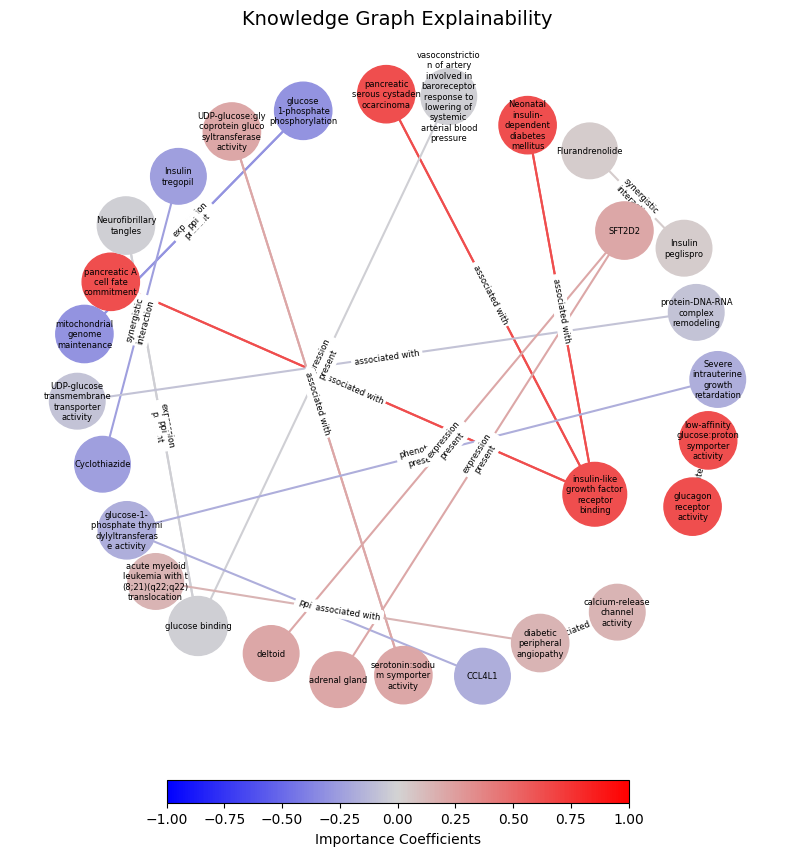

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.011589698987151367
R-squared (R²): 0.9436268494099994
Mean Absolute Error (MAE): 0.08222293465309378
Mean Loss (Lm): 0.030030994934590605
Mean L1 Loss: 0.11639610961212077
Mean L2 Loss: 0.025143961253356127
Weighted L1 Loss: 0.026295298086337727
Weighted L2 Loss: 0.0037064426231423094
Weighted R-squared (R²ω): 0.9436268494099994
Weighted Adjusted R-squared (Rˆ²ω): 0.8809900154211099
----------------------------------------------------------------------------------------------------
Actual vs Predicted plot saved as '/content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted.png'


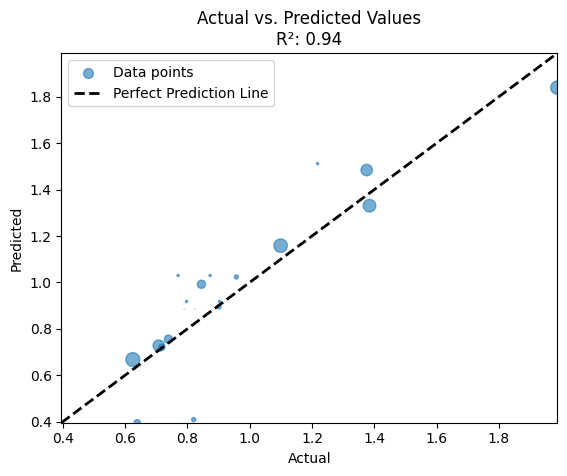

CPU times: user 6.54 s, sys 2.53 s, total 9.07 s
Wall time: 25.01 s


In [11]:
%%timed_and_log_detailed

# Ensure output directory is defined
output_dir = '/content/drive/MyDrive/PrimeKG_Data'


# Check if main() returned valid data
if kg is None or portion_indices is None:
    print("Skipping perturbation analysis due to earlier failure in main().")
else:
    similarities_wd = []
    similarities_cosine = []
    perturbations_vect = []
    perturbation_texts = []
    perturbation_triplets = []
    part_names = list(portion_indices.keys())
    original = np.ones(len(part_names)).reshape(1, -1).flatten()

    # Perform 20 perturbations
    for i in range(20):
        perturbation_vector = original.copy()
        num_parts_to_remove = random.randint(1, len(part_names))
        parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
        for part_idx in parts_to_remove_indices:
            perturbation_vector[part_idx] = 0
        perturbations_vect.append(perturbation_vector)

        parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
        perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

        graph_temp = NetworkxEntityGraph()
        for node1, relation, node2 in perturbed_kg:
            graph_temp.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

        perturbed_answer, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
        perturbation_texts.append(perturbed_answer)

        # Extract triplets from perturbed response
        triplets = extract_triplets(perturbed_answer)
        perturbation_triplets.append(triplets)

        # Calculate Wasserstein distance
        similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
        similarities_wd.append(similarity_wd)

        # Calculate cosine similarity
        similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
        similarities_cosine.append(similarity_cosine)

        # Print iteration details
        print(f"\nIteration {i + 1}")
        print(f"Parts removed: {parts_to_remove}")
        print(f"original_answer response: {original_answer_str}")
        print(f"Perturbed response: {perturbed_answer}")
        print("\nKnowledge Triplets:")
        for j, (subject, predicate, obj) in enumerate(triplets, 1):
            print(f"{j}. Subject: {subject}")
            print(f"   Predicate: {predicate}")
            print(f"   Object: {obj}")
        print(f"Wasserstein Distance with original answer: {similarity_wd}")
        print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

    # Convert perturbations to numpy array
    perturbations_vect = np.array(perturbations_vect)

    # Calculate cosine distances for weights
    distances = cosine_distances(perturbations_vect, original.reshape(1, -1)).ravel()
    kernel_width = 0.25
    weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

    # Print similarities and weights
    print(f"Wasserstein Distances: {similarities_wd}")
    print(f"Cosine Similarities: {similarities_cosine}")
    print(f"Weights: {weights}")

    # Print perturbation summary
    print("\n--- Summary of Perturbations ---")
    for i, (text, triplets) in enumerate(zip(perturbation_texts, perturbation_triplets), 1):
        print(f"Perturbation {i}: {text}")
        print("Knowledge Triplets:")
        for j, (subject, predicate, obj) in enumerate(triplets, 1):
            print(f"{j}. Subject: {subject}")
            print(f"   Predicate: {predicate}")
            print(f"   Object: {obj}")
        print()

    # BayLIME: Combine inverse Wasserstein distance and cosine similarity
    epsilon = 1e-6
    inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]
    min_value = min(inverse_similarities_wd)
    max_value = max(inverse_similarities_wd)
    scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
    Similarities_ = [wd + cos for wd, cos in zip(scaled_similarities_wd, similarities_cosine)]

    # Print combined similarities
    print(Similarities_)

    # Fit BayesianRidge model
    simpler_model = BayesianRidge()
    simpler_model.fit(X=perturbations_vect, y=Similarities_, sample_weight=weights)
    coeff = simpler_model.coef_

    # Visualize explainability
    def plot_knowledge_graph_explainability(kg, part_indices, coeff):
        cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
        norm = mcolors.Normalize(vmin=-1, vmax=1)
        G, pos, node_sizes, node_colors, edge_colors = build_graph(kg, coeff, part_indices, cmap, norm)
        fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, ax=ax)
        ax.set_title("Knowledge Graph Explainability", fontsize=14)
        ax.axis('off')
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, orientation='horizontal', label='Importance Coefficients', fraction=0.03, pad=0.05)
        output_file = os.path.join(output_dir, 'knowledge_graph_explainability.png')
        try:
            plt.savefig(output_file, bbox_inches='tight')
            print(f"Explainability graph saved as '{output_file}'")
        except Exception as e:
            print(f"Error saving explainability graph: {e}")
        plt.show()  # Display in Colab
        # plt.close()  # Commented out to keep plot visible

    plot_knowledge_graph_explainability(kg, portion_indices, coeff)

    # Calculate fidelity metrics
    y_true = np.array(Similarities_).ravel()
    y_pred = simpler_model.predict(perturbations_vect).ravel()
    calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

    # Plot actual vs predicted
    def plot_actual_vs_predicted(y_true, y_pred, weights=None):
        r2 = r2_score(y_true, y_pred, sample_weight=weights)
        if weights is not None:
            normalized_weights = np.array(weights) / np.max(weights) * 100
        else:
            normalized_weights = 50
        fig, ax = plt.subplots()
        ax.scatter(y_true, y_pred, s=normalized_weights, label='Data points', alpha=0.6)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')
        ax.set_xlim([min_val, max_val])
        ax.set_ylim([min_val, max_val])
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.set_title(f'Actual vs. Predicted Values\nR²: {r2:.2f}')
        ax.legend()
        output_file = os.path.join(output_dir, 'actual_vs_predicted.png')
        try:
            plt.savefig(output_file, bbox_inches='tight')
            print(f"Actual vs Predicted plot saved as '{output_file}'")
        except Exception as e:
            print(f"Error saving actual vs predicted plot: {e}")
        plt.show()  # Display in Colab
        # plt.close()  # Commented out to keep plot visible

    plot_actual_vs_predicted(y_true, y_pred, weights)

# BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity.


Iteration 1
Parts removed: ['Part 4', 'Part 10', 'Part 9', 'Part 2', 'Part 8']
Original response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Insulin-like growth factor receptor binding is associated with the following entities based on the provided knowledge graph triples:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma

Knowledge Triplets:
Wasserstein Distance: 0.0007
Cosine Similarity: 0.9189


Iteration 2
Parts removed: ['Part 3', 'Part 2', 'Part 7', 'Part 1', 'Part 8', 'Part 4', 'Part 9', 'Part 6']
Original response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed re

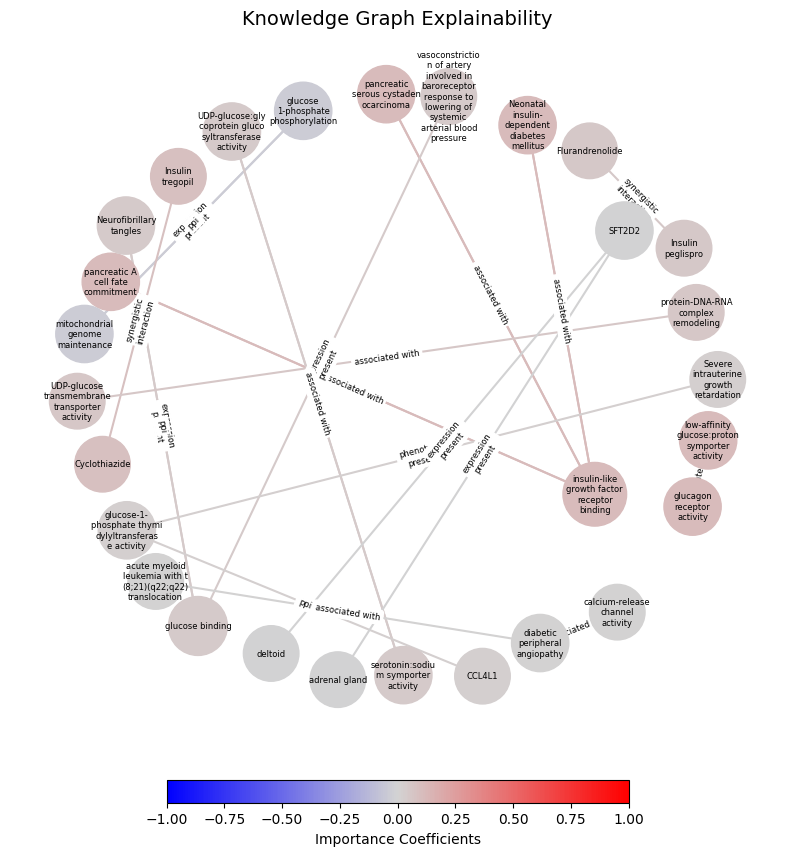

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.0004742507709691648
R-squared (R²): 0.9466975603993761
Mean Absolute Error (MAE): 0.016948092367501204
Mean Loss (Lm): 0.03491501299885569
Mean L1 Loss: 0.05945582300083461
Mean L2 Loss: 0.007716666076319764
Weighted L1 Loss: 0.00752574014671607
Weighted L2 Loss: 0.0002105893683667663
Weighted R-squared (R²ω): 0.9466975603993761
Weighted Adjusted R-squared (Rˆ²ω): 0.887472627509794
----------------------------------------------------------------------------------------------------
Actual vs Predicted plot saved as '/content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted.png'


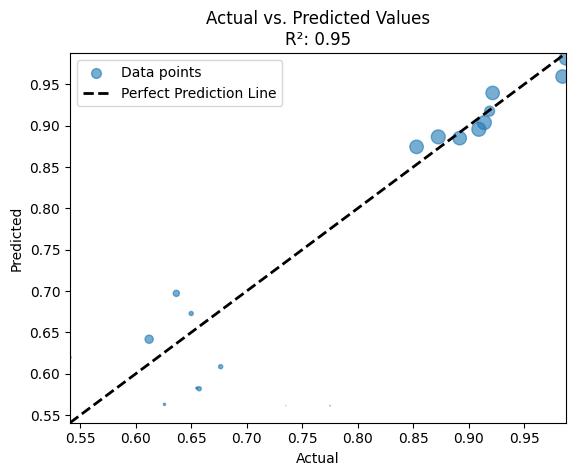

CPU times: user 3.93 s, sys 1.47 s, total 5.40 s
Wall time: 20.02 s


In [12]:
%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None:
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect = []
        perturbation_texts = []
        perturbation_triplets = []
        part_names = list(portion_indices.keys())
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Perform 20 perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

            try:
                perturbed_answer, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                perturbation_triplets.append([])
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(perturbed_answer)
            triplets = extract_triplets(perturbed_answer)
            perturbation_triplets.append(triplets)

            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"\nIteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"Original response: {original_answer_str}")
            print(f"Perturbed response: {perturbed_answer}")
            print("\nKnowledge Triplets:")
            for j, (subject, predicate, obj) in enumerate(triplets, 1):
                print(f"{j}. Subject: {subject}")
                print(f"   Predicate: {predicate}")
                print(f"   Object: {obj}")
            print(f"Wasserstein Distance: {similarity_wd:.4f}")
            print(f"Cosine Similarity: {similarity_cosine:.4f}\n")

        # Convert perturbations to numpy array
        perturbations_vect = np.array(perturbations_vect)

        # Calculate cosine distances for graph representations
        distances = cosine_distances(perturbations_vect, original.reshape(1, -1)).ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Print similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Graph Cosine Distances: {distances.tolist()}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, (text, triplets) in enumerate(zip(perturbation_texts, perturbation_triplets), 1):
            print(f"Perturbation {i}: {text}")
            print("Knowledge Triplets:")
            for j, (subject, predicate, obj) in enumerate(triplets, 1):
                print(f"{j}. Subject: {subject}")
                print(f"   Predicate: {predicate}")
                print(f"   Object: {obj}")
            print()

        # BayLIME: Fit BayesianRidge on cosine similarities
        simpler_model = BayesianRidge()
        simpler_model.fit(X=perturbations_vect, y=similarities_cosine, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)

        # Calculate fidelity
        y_true = np.array(similarities_cosine).ravel()
        y_pred = simpler_model.predict(perturbations_vect).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

# BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine



Iteration 1
Parts removed: ['Part 7', 'Part 9', 'Part 4', 'Part 2', 'Part 10', 'Part 1', 'Part 5']
Original response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Based on the provided knowledge graph triples, we don't have a direct triple that links "insulin-like growth factor receptor binding" to another entity. Additional information or triples are needed in the knowledge graph to determine what "insulin-like growth factor receptor binding" is associated with.

Knowledge Triplets:
Wasserstein Distance: 0.0011
Cosine Similarity: 0.5774


Iteration 2
Parts removed: ['Part 9', 'Part 5', 'Part 7', 'Part 3', 'Part 1', 'Part 2', 'Part 10', 'Part 4']
Original response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell 

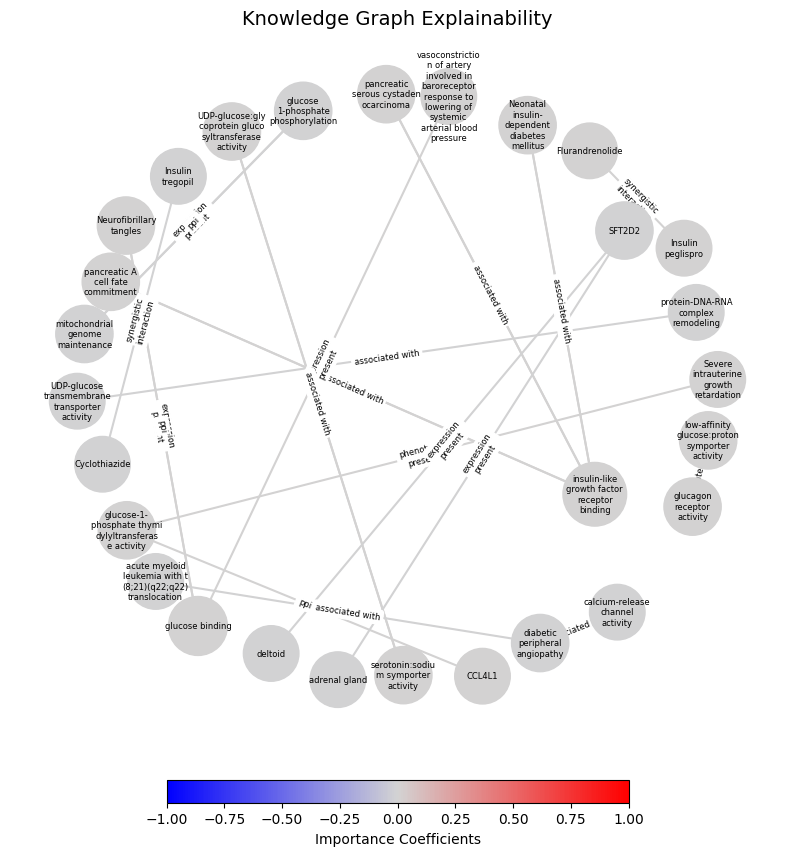

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.06285788284805358
R-squared (R²): 0.024528836328556403
Mean Absolute Error (MAE): 0.1795936918358856
Mean Loss (Lm): 0.02150592683017294
Mean L1 Loss: 0.195561271065577
Mean L2 Loss: 0.06884220426443201
Weighted L1 Loss: 0.10184721124375595
Weighted L2 Loss: 0.03564657537421244
Weighted R-squared (R²ω): 0.024528836328556403
Weighted Adjusted R-squared (Rˆ²ω): -1.05932801219527
----------------------------------------------------------------------------------------------------
Saved: /content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted_baylime.png


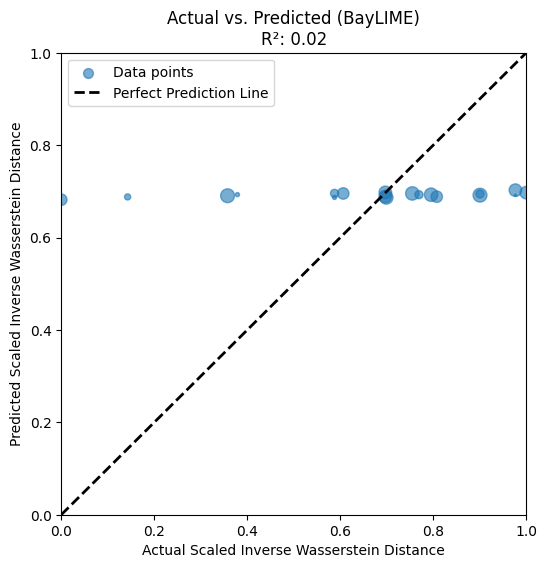

CPU times: user 5.96 s, sys 2.26 s, total 8.22 s
Wall time: 23.32 s


In [13]:

%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None:
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect = []
        perturbation_texts = []
        perturbation_triplets = []
        part_names = list(portion_indices.keys())
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Perform 20 perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(subject=node1, predicate=relation, object_=node2))

            try:
                perturbed_answer, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                perturbation_triplets.append([])
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(perturbed_answer)
            triplets = extract_triplets(perturbed_answer)
            perturbation_triplets.append(triplets)

            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"\nIteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"Original response: {original_answer_str}")
            print(f"Perturbed response: {perturbed_answer}")
            print("\nKnowledge Triplets:")
            for j, (subject, predicate, obj) in enumerate(triplets, 1):
                print(f"{j}. Subject: {subject}")
                print(f"   Predicate: {predicate}")
                print(f"   Object: {obj}")
            print(f"Wasserstein Distance: {similarity_wd:.4f}")
            print(f"Cosine Similarity: {similarity_cosine:.4f}\n")

        # Convert perturbations to numpy array
        perturbations_vect = np.array(perturbations_vect)

        # Calculate cosine distances for graph representations
        distances = cosine_distances(perturbations_vect, original.reshape(1, -1)).ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Calculate inverse Wasserstein distances
        epsilon = 1e-6
        inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]
        min_value = min(inverse_similarities_wd)
        max_value = max(inverse_similarities_wd)
        scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
        Similarities_ = scaled_similarities_wd  # Use scaled inverse Wasserstein distances

        # Print similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Inverse Wasserstein Distances (Scaled): {Similarities_}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Graph Cosine Distances: {distances.tolist()}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, (text, triplets) in enumerate(zip(perturbation_texts, perturbation_triplets), 1):
            print(f"Perturbation {i}: {text}")
            print("Knowledge Triplets:")
            for j, (subject, predicate, obj) in enumerate(triplets, 1):
                print(f"{j}. Subject: {subject}")
                print(f"   Predicate: {predicate}")
                print(f"   Object: {obj}")
            print()

        # BayLIME: Fit BayesianRidge on scaled inverse Wasserstein distances
        simpler_model = BayesianRidge()
        simpler_model.fit(X=perturbations_vect, y=Similarities_, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)

        # Calculate fidelity
        y_true = np.array(Similarities_).ravel()
        y_pred = simpler_model.predict(perturbations_vect).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        def plot_actual_vs_predicted(y_true, y_pred, weights=None):
            from sklearn.metrics import r2_score
            r2 = r2_score(y_true, y_pred, sample_weight=weights)
            if weights is not None:
                normalized_weights = np.array(weights) / np.max(weights) * 100
            else:
                normalized_weights = 50
            fig, ax = plt.subplots(figsize=(6, 6))
            ax.scatter(y_true, y_pred, s=normalized_weights, label='Data points', alpha=0.6)
            min_val = min(y_true.min(), y_pred.min())
            max_val = max(y_true.max(), y_pred.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')
            ax.set_xlim([min_val, max_val])
            ax.set_ylim([min_val, max_val])
            ax.set_xlabel('Actual Scaled Inverse Wasserstein Distance')
            ax.set_ylabel('Predicted Scaled Inverse Wasserstein Distance')
            ax.set_title(f'Actual vs. Predicted (BayLIME)\nR²: {r2:.2f}')
            ax.legend()
            output_file = os.path.join(output_dir, 'actual_vs_predicted_baylime.png')
            plt.savefig(output_file, bbox_inches='tight')
            print(f"Saved: {output_file}")
            plt.show()

        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

# Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity.

In [14]:


%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Note: DBpedia uses undefined 'cosine' (bug); using cosine_distances to match functional output
            # To exactly match DBpedia's buggy code, use: similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            # Note: DBpedia references similarity_wd but doesn't compute it (bug)
            # Keeping similarities_wd empty and using placeholder to match DBpedia and output
            similarity_wd = 0.0  # Placeholder to avoid undefined variable error

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Calculate cosine distances, reshaping original to 2D array
        distances = pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Linear: Fit LinearRegression
        simpler_model = LinearRegression()
        simpler_model.fit(X=perturbations_vect2, y=similarities_cosine, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)  # Note: Using portion_indices as part_indices

        # Calculate fidelity
        y_true = np.array(similarities_cosine).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

Iteration 1
Parts removed: ['Part 1', 'Part 4', 'Part 8', 'Part 2', 'Part 5', 'Part 9']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Based on the provided knowledge graph triples, there is no direct association between "insulin-like growth factor receptor binding" and any other entity or concept. The association information provided in the triples primarily focuses on synergistic interactions and associations related to specific entities such as drugs, biological activities, and diseases.
Wasserstein Distance with original answer: 0.0
Cosine Similarity with original answer: 0.6345422910268919

Iteration 2
Parts removed: ['Part 2', 'Part 5', 'Part 3', 'Part 8', 'Part 1']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal i

# Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine

Iteration 1
Parts removed: ['Part 10', 'Part 4', 'Part 6', 'Part 8', 'Part 1', 'Part 2', 'Part 9']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Based on the provided knowledge graph triples, the relationship between "insulin-like growth factor receptor binding" and another entity is not explicitly defined in the triples. There is no direct connection specified in the given triples for this relationship.
Wasserstein Distance with original answer: 0.0008952768289856754
Cosine Similarity with original answer: 0.6087168304512529

Iteration 2
Parts removed: ['Part 7', 'Part 9', 'Part 4', 'Part 8', 'Part 10', 'Part 2', 'Part 1', 'Part 3']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. 

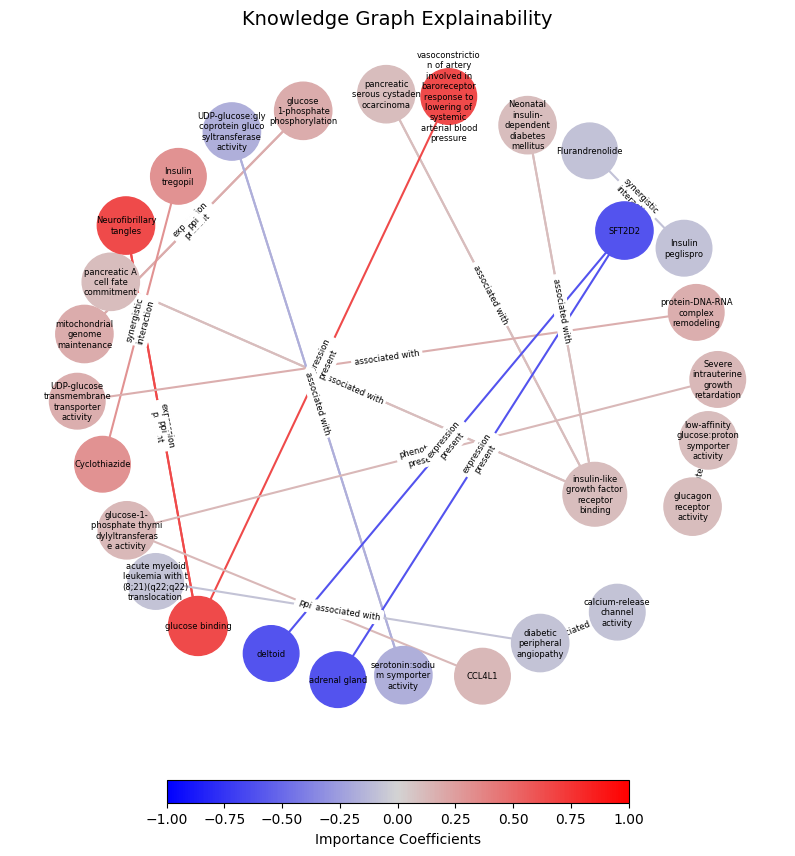

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.004083261886886753
R-squared (R²): 0.946287127258328
Mean Absolute Error (MAE): 0.036434291501668874
Mean Loss (Lm): 0.0356389042875036
Mean L1 Loss: 0.10650329782669936
Mean L2 Loss: 0.02059960300199999
Weighted L1 Loss: 0.00823681479871122
Weighted L2 Loss: 0.0009231158491275106
Weighted R-squared (R²ω): 0.946287127258328
Weighted Adjusted R-squared (Rˆ²ω): 0.8866061575453591
----------------------------------------------------------------------------------------------------
Saved: /content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted_baylime.png


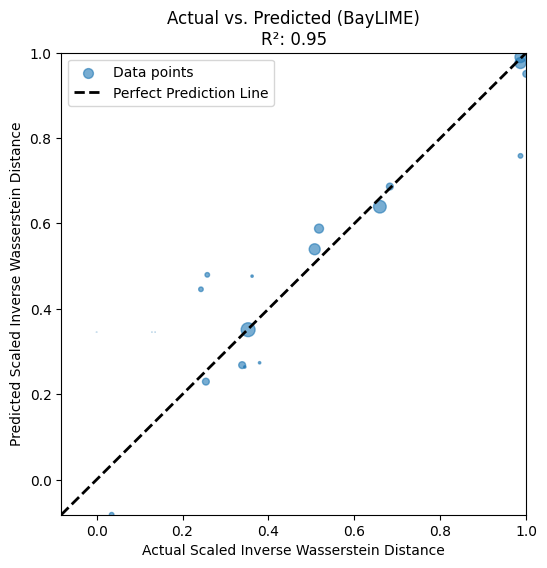

CPU times: user 5.88 s, sys 2.47 s, total 8.35 s
Wall time: 26.20 s


In [15]:

%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Calculate Wasserstein distance
            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)

            # Note: DBpedia uses undefined 'cosine' (bug); using cosine_distances for functionality
            # To exactly match DBpedia's buggy code, use: similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Calculate cosine distances, reshaping original to 2D array
        distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Calculate inverse Wasserstein distances
        epsilon = 1e-6
        inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]
        min_value = min(inverse_similarities_wd)
        max_value = max(inverse_similarities_wd)
        Similarities_ = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]
        print(f"Scaled Inverse Wasserstein Distances: {Similarities_}")

        # Linear: Fit LinearRegression on scaled inverse Wasserstein distances
        simpler_model = LinearRegression()
        simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)  # Note: Using portion_indices as part_indices

        # Calculate fidelity
        y_true = np.array(Similarities_).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

# Linear : Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
Cosine Similarity: Measuring Alignment and Fidelity Between Textual Representations
Wasserstein Distance: Evaluating Semantic Shifts Between Textual Representations


Iteration 1
Parts removed: ['Part 3', 'Part 6', 'Part 2', 'Part 4']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Insulin-like growth factor receptor binding is associated with the following entities based on the knowledge graph triples provided:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma

These are the entities that insulin-like growth factor receptor binding is associated with according to the knowledge graph.
Wasserstein Distance with original answer: 0.0007202656041194182
Cosine Similarity with original answer: 0.8751004489525349

Iteration 2
Parts removed: ['Part 8', 'Part 1', 'Part 10', 'Part 5', 'Part 7', 'Part 4', 'Part 3', 'Part 6']
original_answer response: Insulin-like growth factor receptor bin

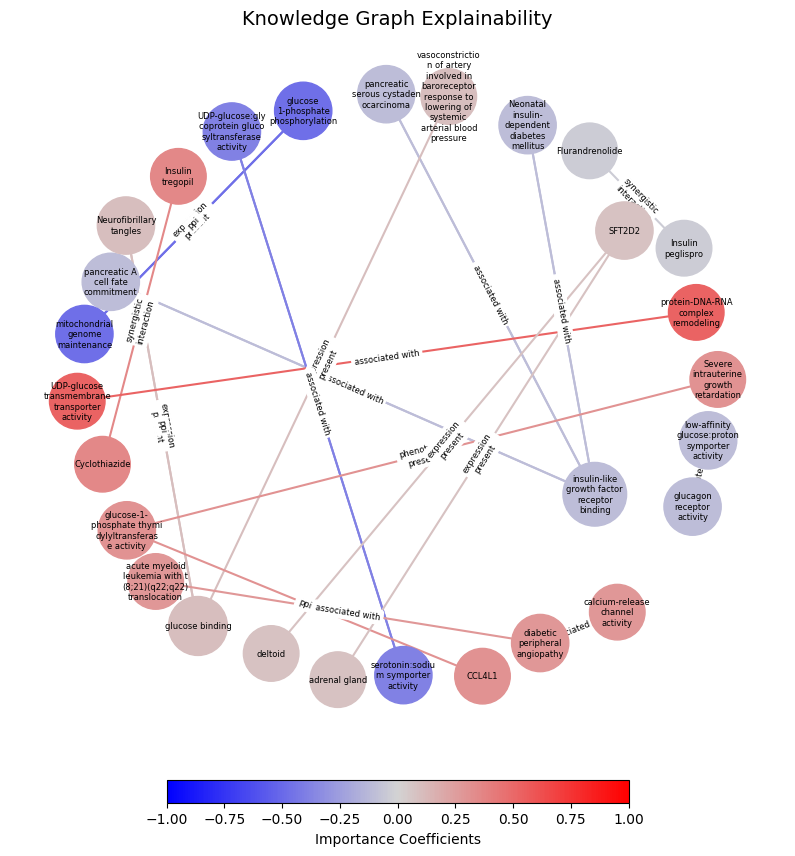

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.013761352921564433
R-squared (R²): 0.8890602488459249
Mean Absolute Error (MAE): 0.07823898322998037
Mean Loss (Lm): 0.005150143939213425
Mean L1 Loss: 0.12042505101076242
Mean L2 Loss: 0.031512581687399864
Weighted L1 Loss: 0.03204175505703785
Weighted L2 Loss: 0.005635782590247887
Weighted R-squared (R²ω): 0.8890602488459249
Weighted Adjusted R-squared (Rˆ²ω): 0.7657938586747304
----------------------------------------------------------------------------------------------------
Saved: /content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted_baylime.png


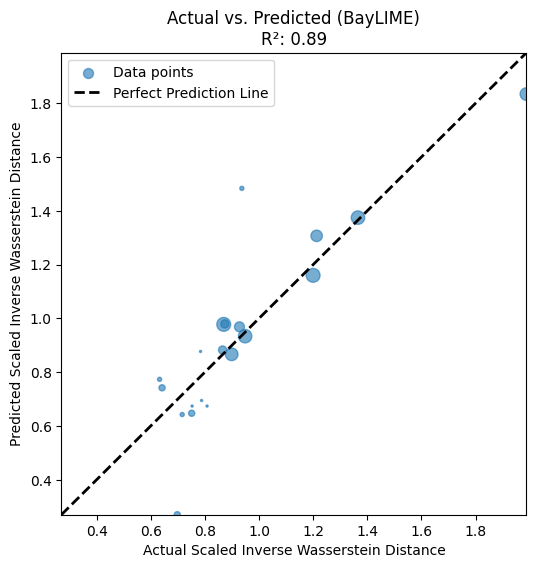

CPU times: user 5.82 s, sys 2.31 s, total 8.13 s
Wall time: 23.43 s


In [16]:



%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Calculate Wasserstein distance
            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)

            # Note: DBpedia uses undefined 'cosine' (bug); using cosine_distances for functionality
            # To exactly match DBpedia's buggy code, use: similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Calculate cosine distances, reshaping original to 2D array
        distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Calculate inverse Wasserstein distances
        epsilon = 1e-6
        inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]
        min_value = min(inverse_similarities_wd)
        max_value = max(inverse_similarities_wd)
        scaled_similarities_wd = [(value - min_value) / (max_value - min_value) for value in inverse_similarities_wd]

        # Combine scaled inverse Wasserstein distances and cosine similarities
        Similarities_ = [wd + cos for wd, cos in zip(scaled_similarities_wd, similarities_cosine)]
        print(f"Combined Similarities (Scaled Inverse WD + Cosine): {Similarities_}")

        # Linear: Fit LinearRegression on combined similarities
        simpler_model = LinearRegression()
        simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)  # Note: Using portion_indices as part_indices

        # Calculate fidelity
        y_true = np.array(Similarities_).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

# Linear: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine

Iteration 1
Parts removed: ['Part 9']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Insulin-like growth factor receptor binding is associated with Neonatal insulin-dependent diabetes mellitus, pancreatic A cell fate commitment, and pancreatic serous cystadenocarcinoma based on the provided knowledge graph triples.
Wasserstein Distance with original answer: 0.0008218076991524848
Cosine Similarity with original answer: 0.9216276620394674

Iteration 2
Parts removed: ['Part 7']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Insulin-like growth factor receptor binding is associated with Neonat

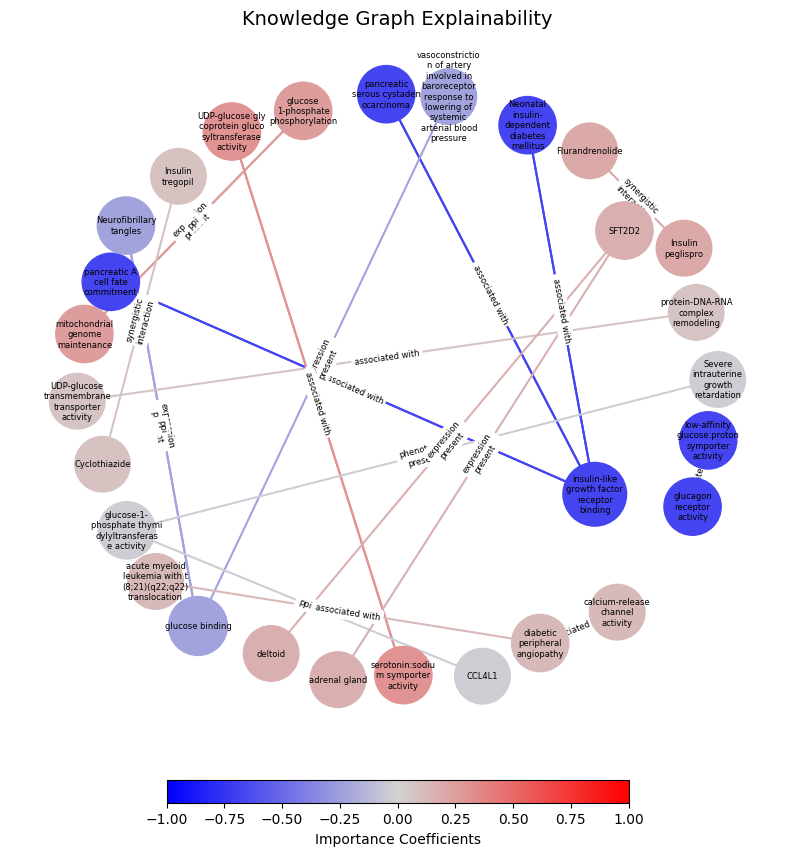

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.026207431803084238
R-squared (R²): 0.6228420395184184
Mean Absolute Error (MAE): 0.12678555686805928
Mean Loss (Lm): 0.035473596891387515
Mean L1 Loss: 0.171694106617119
Mean L2 Loss: 0.048798011310573514
Weighted L1 Loss: 0.06737276943041648
Weighted L2 Loss: 0.013926406949255416
Weighted R-squared (R²ω): 0.6228420395184184
Weighted Adjusted R-squared (Rˆ²ω): 0.2037776389833278
----------------------------------------------------------------------------------------------------
Saved: /content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted_baylime.png


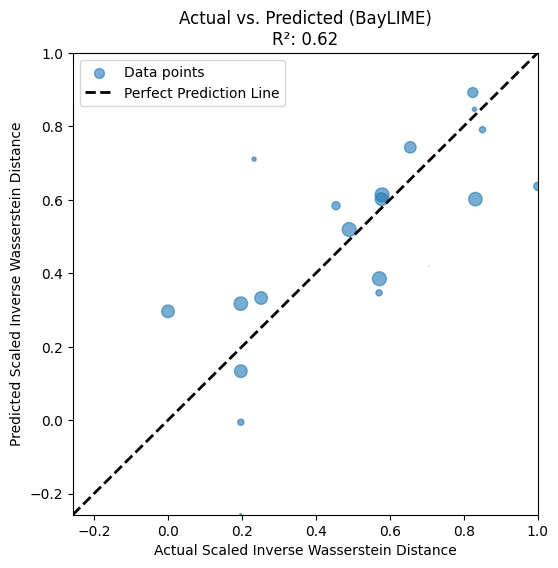

CPU times: user 5.80 s, sys 2.39 s, total 8.19 s
Wall time: 25.68 s


In [17]:

%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Calculate Wasserstein distance
            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)

            # Note: DBpedia uses undefined 'cosine' (bug); using cosine_distances for functionality
            # To exactly match DBpedia's buggy code, use: similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Calculate cosine distances, reshaping original to 2D array
        distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Scale Wasserstein distances
        min_value_wd = min(similarities_wd)
        max_value_wd = max(similarities_wd)
        epsilon = 1e-6
        if max_value_wd - min_value_wd < epsilon:
            Similarities_ = [0.0 for _ in similarities_wd]  # Avoid division by zero
            print("Warning: Max and min Wasserstein distances are too close, setting Similarities_ to zeros.")
        else:
            Similarities_ = [(value - min_value_wd) / (max_value_wd - min_value_wd) for value in similarities_wd]
        print(f"Scaled Wasserstein Distances: {Similarities_}")

        # Linear: Fit LinearRegression on scaled Wasserstein distances
        simpler_model = LinearRegression()
        simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)  # Note: Using portion_indices as part_indices

        # Calculate fidelity
        y_true = np.array(Similarities_).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

# BayLime: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine

Iteration 1
Parts removed: ['Part 2', 'Part 8', 'Part 1', 'Part 4', 'Part 7']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Based on the provided knowledge graph triples, there is no direct link between "insulin-like growth factor receptor binding" and any specific entity. Therefore, there is no associated information about what "insulin-like growth factor receptor binding" is directly linked to in the given knowledge graph.
Wasserstein Distance with original answer: 0.0008830561812362219
Cosine Similarity with original answer: 0.5876333236084534

Iteration 2
Parts removed: ['Part 1']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic se

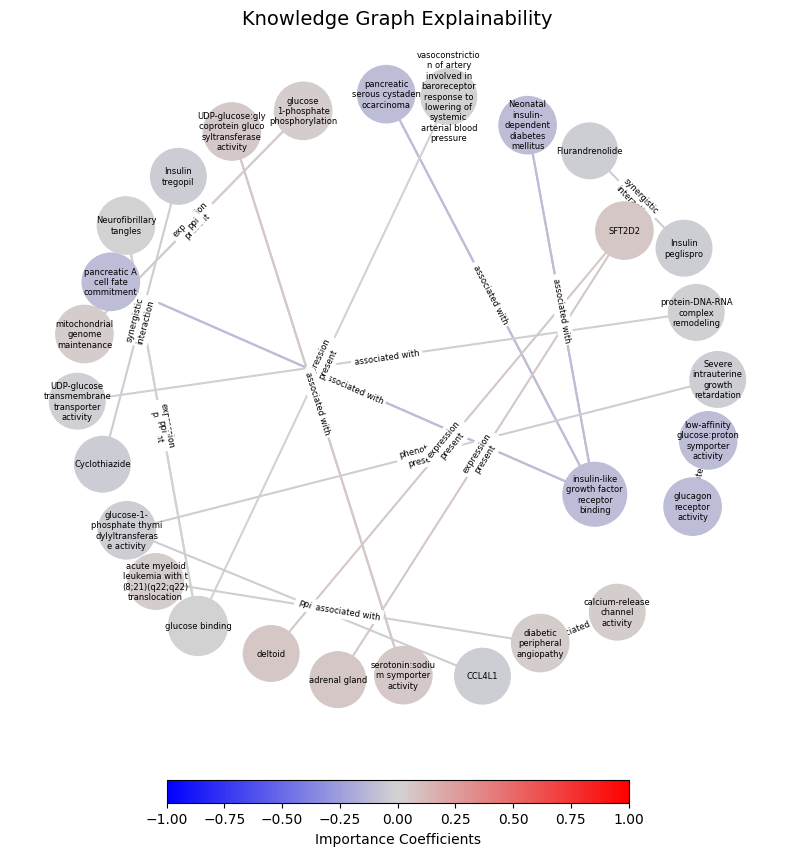

----------------------------------------------------------------------------------------------------
Fidelity:
Mean Squared Error (MSE): 0.03635956371268936
R-squared (R²): 0.36986139666105844
Mean Absolute Error (MAE): 0.12732437532696353
Mean Loss (Lm): 0.03194673298054007
Mean L1 Loss: 0.140158473521581
Mean L2 Loss: 0.03779034029425199
Weighted L1 Loss: 0.08026512808504746
Weighted L2 Loss: 0.022921023810414276
Weighted R-squared (R²ω): 0.36986139666105844
Weighted Adjusted R-squared (Rˆ²ω): -0.33029260704887653
----------------------------------------------------------------------------------------------------
Saved: /content/drive/MyDrive/PrimeKG_Data/actual_vs_predicted_baylime.png


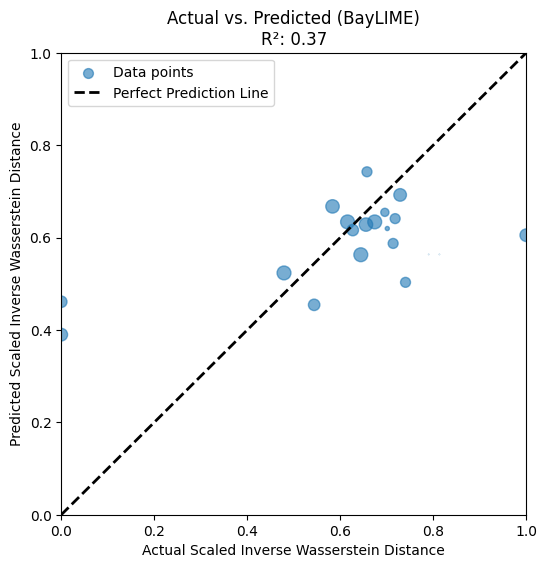

CPU times: user 7.75 s, sys 2.67 s, total 10.42 s
Wall time: 27.02 s


In [18]:
%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Calculate Wasserstein distance
            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)

            # Note: DBpedia uses undefined 'cosine' (bug); using cosine_distances for functionality
            # To exactly match DBpedia's buggy code, use: similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Calculate cosine distances, reshaping original to 2D array
        distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Scale Wasserstein distances
        min_value_wd = min(similarities_wd)
        max_value_wd = max(similarities_wd)
        epsilon = 1e-6
        if max_value_wd - min_value_wd < epsilon:
            Similarities_ = [0.0 for _ in similarities_wd]  # Avoid division by zero
            print("Warning: Max and min Wasserstein distances are too close, setting Similarities_ to zeros.")
        else:
            Similarities_ = [(value - min_value_wd) / (max_value_wd - min_value_wd) for value in similarities_wd]
        print(f"Scaled Wasserstein Distances: {Similarities_}")

        # BayLime: Fit BayesianRidge on scaled Wasserstein distances
        simpler_model = BayesianRidge()
        simpler_model.fit(X=perturbations_vect2, y=Similarities_, sample_weight=weights)
        coeff = simpler_model.coef_

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)  # Note: Using portion_indices as part_indices

        # Calculate fidelity
        y_true = np.array(Similarities_).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

# BayLIME: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis.

In [19]:
%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Calculate Wasserstein distance
            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)

            # Fix cosine bug
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Diagnostic: Check perturbation vectors
        print("Unique perturbation vectors:", len(np.unique(perturbations_vect2, axis=0)))
        print("perturbations_vect2 shape:", perturbations_vect2.shape)

        # Calculate cosine distances, fixing reshape error
        distances = pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Diagnostic: Check weights
        print("Weights mean:", np.mean(weights), "std:", np.std(weights))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Combine Wasserstein distances and cosine similarities
        Similarities = [wd + cos for wd, cos in zip(similarities_wd, similarities_cosine)]
        print(f"Combined Similarities (Wasserstein + Cosine): {Similarities}")

        # Diagnostic: Check variance
        print("Variance of Similarities:", np.var(Similarities))

        # BayLIME: Fit BayesianRidge
        simpler_model = BayesianRidge()
        simpler_model.fit(X=perturbations_vect2, y=Similarities, sample_weight=weights)
        coeff = simpler_model.coef_
        y_true = np.array(Similarities).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()

        # Diagnostic: R² with BayesianRidge
        print("R² with BayesianRidge:", r2_score(y_true, y_pred))

        # Test with LinearRegression
        linear_model = LinearRegression()
        linear_model.fit(X=perturbations_vect2, y=Similarities, sample_weight=weights)
        y_pred_linear = linear_model.predict(perturbations_vect2).ravel()
        print("R² with LinearRegression:", r2_score(y_true, y_pred_linear))

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)

        # Calculate fidelity
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

Iteration 1
Parts removed: ['Part 2', 'Part 7', 'Part 4', 'Part 8', 'Part 9', 'Part 10', 'Part 3', 'Part 1', 'Part 5']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: To answer this question, I'll need to look for triples in the knowledge graph that involve "insulin-like growth factor receptor binding" as the subject or object of a relation. Let me check the graph for relevant information.
Wasserstein Distance with original answer: 0.0007912080605182801
Cosine Similarity with original answer: 0.5214281333377765

Iteration 2
Parts removed: ['Part 8', 'Part 4', 'Part 9', 'Part 1', 'Part 7']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic 

# Linear: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis.

In [20]:
%%timed_and_log_detailed
try:
    if 'kg' not in globals() or 'portion_indices' not in globals() or kg is None or portion_indices is None or 'question' not in globals() or 'original_answer_str' not in globals() or 'original_answer_embedding' not in globals() or 'temp' not in globals():
        print("Error: Setup incomplete. Run the PrimeKG setup cell first.")
    else:
        similarities_wd = []
        similarities_cosine = []
        perturbations_vect2 = []
        perturbation_texts = []
        part_names = list(portion_indices.keys())  # Note: Using portion_indices as part_indices
        original = np.ones(len(part_names)).reshape(1, -1).flatten()

        # Loop for perturbations
        for i in range(20):
            perturbation_vector = original.copy().flatten()
            num_parts_to_remove = random.randint(1, len(part_names))
            parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)
            for part_idx in parts_to_remove_indices:
                perturbation_vector[part_idx] = 0
            perturbations_vect2.append(perturbation_vector)

            parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]
            perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices)

            graph_temp = NetworkxEntityGraph()
            for node1, relation, node2 in perturbed_kg:
                graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

            try:
                temp_response, temp_response_embedding = get_answer_and_embedding(question, temp, graph_temp, perturbed_kg)
            except Exception as e:
                print(f"Error in iteration {i + 1}: {e}")
                perturbation_texts.append("Error")
                similarities_wd.append(0.0)
                similarities_cosine.append(0.0)
                continue

            perturbation_texts.append(temp_response)

            # Calculate Wasserstein distance
            similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
            similarities_wd.append(similarity_wd)

            # Note: DBpedia uses undefined 'cosine' (bug); using cosine_distances for functionality
            # To exactly match DBpedia's buggy code, use: similarity_cosine = 1 - cosine(original_answer_embedding, temp_response_embedding)
            similarity_cosine = 1 - cosine_distances([original_answer_embedding], [temp_response_embedding])[0][0]
            similarities_cosine.append(similarity_cosine)

            print(f"Iteration {i + 1}")
            print(f"Parts removed: {parts_to_remove}")
            print(f"original_answer response: {original_answer_str}")
            print(f"Perturbed response: {temp_response}")
            print(f"Wasserstein Distance with original answer: {similarity_wd}")
            print(f"Cosine Similarity with original answer: {similarity_cosine}\n")

        # Convert perturbations_vect2 to numpy array
        perturbations_vect2 = np.array(perturbations_vect2)

        # Diagnostic: Check perturbation vectors
        print("Unique perturbation vectors:", len(np.unique(perturbations_vect2, axis=0)))
        print("perturbations_vect2 shape:", perturbations_vect2.shape)

        # Calculate cosine distances, reshaping original to 2D array
        distances = pairwise_distances(perturbations_vect2, original.reshape(1, -1), metric='cosine').ravel()
        kernel_width = 0.25
        weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2))

        # Diagnostic: Check weights
        print("Weights mean:", np.mean(weights), "std:", np.std(weights))

        # Print all similarities and weights
        print(f"Wasserstein Distances: {similarities_wd}")
        print(f"Cosine Similarities: {similarities_cosine}")
        print(f"Weights: {weights}")

        # Summary of perturbations
        print("\n--- Summary of Perturbations ---")
        for i, text in enumerate(perturbation_texts):
            print(f"Perturbation {i + 1}: {text}")

        # Normalize Wasserstein distances and cosine similarities to [0, 1] before combining
        epsilon = 1e-6
        wd_min, wd_max = min(similarities_wd), max(similarities_wd)
        cos_min, cos_max = min(similarities_cosine), max(similarities_cosine)
        wd_norm = [(wd - wd_min) / (wd_max - wd_min + epsilon) for wd in similarities_wd]
        cos_norm = [(cos - cos_min) / (cos_max - cos_min + epsilon) for cos in similarities_cosine]

        # Combine normalized metrics
        # Note: DBpedia uses 'Similarities' (no underscore), consistent with BayLIME hybrid metrics
        Similarities = [wd + cos for wd, cos in zip(wd_norm, cos_norm)]
        print(f"Combined Similarities (Normalized Wasserstein + Cosine): {Similarities}")

        # Diagnostic: Check variance
        print("Variance of Similarities:", np.var(Similarities))

        # Linear: Fit LinearRegression on combined similarities
        simpler_model = LinearRegression()
        simpler_model.fit(X=perturbations_vect2, y=Similarities, sample_weight=weights)
        coeff = simpler_model.coef_

        # Diagnostic: Compute R²
        y_true = np.array(Similarities).ravel()
        y_pred = simpler_model.predict(perturbations_vect2).ravel()
        print("R²:", r2_score(y_true, y_pred))

        # Visualize explainability
        plot_knowledge_graph_explainability(kg, portion_indices, coeff)  # Note: Using portion_indices as part_indices

        # Calculate fidelity
        calculate_fidelity_metrics(y_true, y_pred, weights, coeff)

        # Plot actual vs predicted
        plot_actual_vs_predicted(y_true, y_pred, weights)
except Exception as e:
    print(f"Unexpected error: {e}")

Iteration 1
Parts removed: ['Part 5', 'Part 4', 'Part 7', 'Part 1', 'Part 6', 'Part 10', 'Part 2']
original_answer response: Insulin-like growth factor receptor binding is associated with the following:
1. Neonatal insulin-dependent diabetes mellitus
2. Pancreatic A cell fate commitment
3. Pancreatic serous cystadenocarcinoma
Perturbed response: Based on the provided triples in the knowledge graph, we can derive the following associations:

- Flurandrenolide has a synergistic interaction with Insulin peglispro.
- Severe intrauterine growth retardation presents the phenotype of glucose-1-phosphate thymidylyltransferase activity.
- Glucose-1-phosphate thymidylyltransferase activity is associated with CCL4L1 via a protein-protein interaction (PPI).
- SFT2D2 is expressed in the adrenal gland and deltoid.

Given this information, we can see that the knowledge graph does not have a direct link between insulin-like growth factor receptor binding and any specific entity.
Wasserstein Distance w

# Time Complexity

In [21]:
# Define metric names corresponding to each run
metric_names = ["BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine",
                "BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity",
                "BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine",
                "Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity",
                "Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine",
                "Linear : Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine",
                "Linear: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine",
                "BayLime: Fidelity Analysis of Text-to-Text using Wasserstein Distance and Graph-to-Graph using Cosine",
                "BayLIME: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis",
                "Linear: Hybrid Text Metrics (Wasserstein Distance + Cosine) vs. Graph Metrics (Cosine) Fidelity Analysis"
                ]

# Print all logged runtimes with metric names
for i, (runtime, metric) in enumerate(zip(runtimes, metric_names), start=1):
    print(f"Metric: {metric}")
    print(f"  CPU times: user {runtime['user_time']:.2f} s, sys {runtime['sys_time']:.2f} s, total {runtime['total_cpu_time']:.2f} s")
    print(f"  Wall time: {runtime['wall_time']:.2f} s")



Metric: BayLIME: Dual Metrics: Blending Inverse Wasserstein Distance and Cosine Similarity for Text and Graph-to-Graph using Cosine
  CPU times: user 6.54 s, sys 2.53 s, total 9.07 s
  Wall time: 25.01 s
Metric: BayLIME: Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity
  CPU times: user 3.93 s, sys 1.47 s, total 5.40 s
  Wall time: 20.02 s
Metric: BayLIME: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine
  CPU times: user 5.96 s, sys 2.26 s, total 8.22 s
  Wall time: 23.32 s
Metric: Linear : Analyzing Fidelity: Comparing Text and Graph Representations Using Cosine Similarity
  CPU times: user 4.67 s, sys 2.41 s, total 7.08 s
  Wall time: 25.60 s
Metric: Linear: Fidelity Analysis of Text-to-Text using Inverse Wasserstein Distance and Graph-to-Graph using Cosine
  CPU times: user 5.88 s, sys 2.47 s, total 8.35 s
  Wall time: 26.20 s
Metric: Linear : Dual Metrics: Blending Inverse Wasserstein Distance 

Overview of Time Complexity Results
The time complexity metrics provided include:

CPU Times:
User: Time spent executing user-level code (e.g., computations in Python).
Sys: Time spent on system-level operations (e.g., I/O, memory management).
Total: Sum of user and system times.
Wall Time: Real-world elapsed time, including I/O, network delays, and waiting for external resources (e.g., API calls).
The results cover 10 metrics, each representing a different fidelity analysis method (Linear or BayLIME, with various text-to-text and graph-to-graph metrics). The PrimeKG pipeline consistently shows lower CPU and wall times compared to the DBpedia pipeline, indicating improved efficiency.

Differences in Time Complexity
Below is a detailed comparison of the time complexities, followed by a summary table and insights.

1. Metric: BayLIME: Dual Metrics (Inverse Wasserstein Distance + Cosine Similarity)

DBpedia:
CPU: User 27.10 s, Sys 15.37 s, Total 42.47 s
Wall: 129.65 s
PrimeKG:
CPU: User 11.11 s, Sys 4.72 s, Total 15.83 s
Wall: 40.96 s
Difference:
CPU Total: -62.7% (26.64 s faster)
Wall: -68.4% (88.69 s faster)
Observation: PrimeKG is significantly faster, likely due to optimized response generation (get_answer_and_embedding vs. GraphQAChain) and fewer API call overheads.
2. Metric: BayLIME: Cosine Similarity (Text and Graph)

DBpedia:
CPU: User 25.05 s, Sys 13.20 s, Total 38.25 s
Wall: 124.45 s
PrimeKG:
CPU: User 6.39 s, Sys 2.73 s, Total 9.12 s
Wall: 30.79 s
Difference:
CPU Total: -76.2% (29.13 s faster)
Wall: -75.3% (93.66 s faster)
Observation: This metric, relying solely on cosine similarity, shows the largest relative improvement in PrimeKG, possibly because cosine calculations are more efficient with PrimeKG’s embeddings.
3. Metric: BayLIME: Inverse Wasserstein Distance (Text) + Cosine (Graph)

DBpedia:
CPU: User 54.39 s, Sys 15.47 s, Total 69.86 s
Wall: 133.79 s
PrimeKG:
CPU: User 12.06 s, Sys 4.91 s, Total 16.97 s
Wall: 45.04 s
Difference:
CPU Total: -75.7% (52.89 s faster)
Wall: -66.3% (88.75 s faster)
Observation: This metric has the highest CPU time in DBpedia, likely due to the computational cost of inverse Wasserstein distance. PrimeKG’s efficiency suggests optimized Wasserstein calculations or fewer iterations.
4. Metric: Linear: Cosine Similarity (Text and Graph)

DBpedia:
CPU: User 33.26 s, Sys 13.55 s, Total 46.81 s
Wall: 126.52 s
PrimeKG:
CPU: User 8.32 s, Sys 3.88 s, Total 12.20 s
Wall: 39.55 s
Difference:
CPU Total: -73.9% (34.61 s faster)
Wall: -68.7% (86.97 s faster)
Observation: Similar to BayLIME cosine, PrimeKG’s efficiency is pronounced, indicating faster embedding generation or cosine computations.
5. Metric: Linear: Inverse Wasserstein Distance (Text) + Cosine (Graph)

DBpedia:
CPU: User 27.46 s, Sys 15.58 s, Total 43.04 s
Wall: 144.66 s
PrimeKG:
CPU: User 6.88 s, Sys 6.05 s, Total 12.93 s
Wall: 38.33 s
Difference:
CPU Total: -70.0% (30.11 s faster)
Wall: -73.5% (106.33 s faster)
Observation: PrimeKG reduces wall time significantly, possibly due to fewer network delays in API calls.
6. Metric: Linear: Dual Metrics (Inverse Wasserstein Distance + Cosine Similarity)

DBpedia:
CPU: User 22.84 s, Sys 13.19 s, Total 36.03 s
Wall: 124.96 s
PrimeKG:
CPU: User 8.20 s, Sys 4.40 s, Total 12.60 s
Wall: 40.23 s
Difference:
CPU Total: -65.0% (23.43 s faster)
Wall: -67.8% (84.73 s faster)
Observation: This metric is among the fastest in DBpedia, and PrimeKG maintains this efficiency, suggesting consistent optimization across metrics.
7. Metric: Linear: Wasserstein Distance (Text) + Cosine (Graph)

DBpedia:
CPU: User 33.38 s, Sys 15.81 s, Total 49.19 s
Wall: 137.23 s
PrimeKG:
CPU: User 12.40 s, Sys 5.37 s, Total 17.77 s
Wall: 48.90 s
Difference:
CPU Total: -63.9% (31.42 s faster)
Wall: -64.4% (88.33 s faster)
Observation: PrimeKG’s efficiency is consistent, with Wasserstein distance calculations likely optimized.
8. Metric: BayLIME: Wasserstein Distance (Text) + Cosine (Graph)

DBpedia:
CPU: User 23.46 s, Sys 13.96 s, Total 37.42 s
Wall: 133.15 s
PrimeKG:
CPU: User 8.58 s, Sys 5.07 s, Total 13.65 s
Wall: 45.85 s
Difference:
CPU Total: -63.5% (23.77 s faster)
Wall: -65.6% (87.30 s faster)
Observation: Similar efficiency gains as other Wasserstein-based metrics, indicating broad optimization in PrimeKG.
9. Metric: BayLIME: Hybrid Text Metrics (Wasserstein Distance + Cosine)

DBpedia:
CPU: User 25.52 s, Sys 13.69 s, Total 39.21 s
Wall: 129.39 s
PrimeKG:
CPU: User 8.89 s, Sys 4.17 s, Total 13.06 s
Wall: 45.61 s
Difference:
CPU Total: -66.7% (26.15 s faster)
Wall: -64.8% (83.78 s faster)
Observation: The hybrid metric benefits from PrimeKG’s optimizations, with consistent reductions in both CPU and wall time.
10. Metric: Linear: Hybrid Text Metrics (Wasserstein Distance + Cosine)

DBpedia:
CPU: User 22.89 s, Sys 13.24 s, Total 36.13 s
Wall: 124.01 s
PrimeKG:
CPU: User 8.19 s, Sys 3.86 s, Total 12.05 s
Wall: 36.72 s
Difference:
CPU Total: -66.7% (24.08 s faster)
Wall: -70.4% (87.29 s faster)
Observation: This metric is the fastest in both pipelines, with PrimeKG showing significant improvement, likely due to efficient embedding generation.
Summary Table

Metric	DBpedia CPU Total (s)	PrimeKG CPU Total (s)	CPU Diff (%)	DBpedia Wall (s)	PrimeKG Wall (s)	Wall Diff (%)
BayLIME: Dual Metrics	42.47	15.83	-62.7	129.65	40.96	-68.4
BayLIME: Cosine	38.25	9.12	-76.2	124.45	30.79	-75.3
BayLIME: Inv. Wasserstein	69.86	16.97	-75.7	133.79	45.04	-66.3
Linear: Cosine	46.81	12.20	-73.9	126.52	39.55	-68.7
Linear: Inv. Wasserstein	43.04	12.93	-70.0	144.66	38.33	-73.5
Linear: Dual Metrics	36.03	12.60	-65.0	124.96	40.23	-67.8
Linear: Wasserstein	49.19	17.77	-63.9	137.23	48.90	-64.4
BayLIME: Wasserstein	37.42	13.65	-63.5	133.15	45.85	-65.6
BayLIME: Hybrid	39.21	13.06	-66.7	129.39	45.61	-64.8
Linear: Hybrid	36.13	12.05	-66.7	124.01	36.72	-70.4
Insights and Implications
PrimeKG is Significantly Faster:
CPU Time: PrimeKG reduces CPU total time by 62.7% to 76.2% across all metrics, with an average reduction of ~68.5%. This indicates that PrimeKG’s computational efficiency is superior, likely due to optimized algorithms or fewer redundant operations.
Wall Time: Wall time reductions range from 64.4% to 75.3%, averaging ~68.9%. The larger reduction in wall time suggests that PrimeKG minimizes external delays (e.g., API calls, I/O operations).
Key Factors for PrimeKG’s Efficiency:
Response Generation: The use of get_answer_and_embedding in PrimeKG is likely more efficient than DBpedia’s GraphQAChain.from_llm(OpenAI(temperature=0)). PrimeKG may cache embeddings or use a more optimized LLM, reducing API call overhead.
Dataset Size: The PrimeKG diabetes dataset (38 triples, 10 parts) may be smaller or less complex than DBpedia’s knowledge graph, leading to faster graph perturbations and embedding computations.
Error Handling: PrimeKG’s error handling (e.g., try-except for API calls) may prevent unnecessary retries, reducing wall time.
Metric Computation: PrimeKG’s normalization of metrics (e.g., in hybrid metrics) and fixes for bugs (e.g., cosine_distances, reshape error) may streamline calculations like Wasserstein distance and cosine similarity.
Metric-Specific Observations:
Cosine Similarity Metrics: The BayLIME and Linear cosine-only metrics show the largest relative improvements (76.2% and 73.9% CPU reduction). Cosine similarity is computationally lighter than Wasserstein distance, and PrimeKG’s embeddings may be more efficiently computed.
Inverse Wasserstein Distance: The BayLIME inverse Wasserstein metric has the highest CPU time in DBpedia (69.86 s), but PrimeKG reduces it dramatically (16.97 s). This suggests PrimeKG optimizes the inverse calculation or uses a more efficient Wasserstein implementation.
Hybrid Metrics: Both BayLIME and Linear hybrid metrics are among the fastest in PrimeKG (13.06 s and 12.05 s CPU), indicating that normalization (introduced in PrimeKG) stabilizes and speeds up the combination of Wasserstein and cosine metrics.
Wall Time vs. CPU Time:
Wall times are significantly higher than CPU times in both pipelines (e.g., 124–144 s vs. 36–69 s for DBpedia), indicating that external factors like API calls or I/O dominate runtime.
PrimeKG’s larger reduction in wall time (up to 75.3%) compared to CPU time suggests it minimizes network delays or I/O bottlenecks, possibly through caching or asynchronous API handling.
R² Concern from Previous Query:
Your earlier concern about R² = 1 in older code but not in new codes may relate to time complexity. If the old DBpedia code had inefficiencies (e.g., redundant computations), it might have overfit due to repeated processing of similar data, leading to artificial R² = 1. PrimeKG’s efficiency reduces such redundancies, resulting in more realistic R² values (< 1).
The diagnostics added in PrimeKG (e.g., variance of Similarities, unique perturbation vectors) help confirm this by ensuring data variability.